<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Slip%20estimation%20in%204%20wheeled%20Mecanum%20robot/ML_FinalProject_SlipEstimation_SQUARE_Final_EDIT_40308334.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#test4



#Loading data

In [2]:
!gdown 1unKAdagFsrXcJVjztrMyPK9fIUe1Se3n

Downloading...
From: https://drive.google.com/uc?id=1unKAdagFsrXcJVjztrMyPK9fIUe1Se3n
To: /content/simulink_signal_test4.xlsx
100% 235k/235k [00:00<00:00, 62.6MB/s]


In [3]:
import pandas as pd

df = pd.read_excel('/content/simulink_signal_test4.xlsx')

display(df.head())

,Time,T_ddot_1,T_ddot_2,T_ddot_3,T_ddot_4,T_dot_1,T_dot_2,T_dot_3,T_dot_4,X_dot_1,X_dot_2,X_dot_3,robot_1,robot_2,robot_3,X_cam_1,X_cam_2,X_cam_3
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000296,-0.001143,-0.002077
1,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000117,-0.001160,-0.002412
2,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000663,0.000570,0.000736
3,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000073,-0.000420,-0.000445
4,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000775,0.000134,-0.000212


In [4]:
df = df.drop('Time', axis=1)

display(df.head())

print(f"Shape of the modified dataframe: {df.shape}")

,T_ddot_1,T_ddot_2,T_ddot_3,T_ddot_4,T_dot_1,T_dot_2,T_dot_3,T_dot_4,X_dot_1,X_dot_2,X_dot_3,robot_1,robot_2,robot_3,X_cam_1,X_cam_2,X_cam_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000296,-0.001143,-0.002077
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000117,-0.001160,-0.002412
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000663,0.000570,0.000736
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000073,-0.000420,-0.000445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000775,0.000134,-0.000212


Shape of the modified dataframe: (1832, 17)


In [5]:
df['slip_x'] = df['X_cam_1'] - df['robot_1']
df['slip_y'] = df['X_cam_2'] - df['robot_2']

In [6]:
df = df.drop(['X_cam_1', 'X_cam_2', 'X_cam_3'], axis=1)
display(df.head())

,T_ddot_1,T_ddot_2,T_ddot_3,T_ddot_4,T_dot_1,T_dot_2,T_dot_3,T_dot_4,X_dot_1,X_dot_2,X_dot_3,robot_1,robot_2,robot_3,slip_x,slip_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000296,-0.001143
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000117,-0.001160
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000663,0.000570
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000073,-0.000420
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000775,0.000134


#Correlation

##Slip x

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlations with 'slip_x'
print("Correlation with 'slip_x':")
display(correlation_matrix['slip_x'].sort_values(ascending=False))

Correlation with 'slip_x':


,slip_x
slip_x,1.000000
robot_1,0.797859
T_dot_3,0.666395
robot_2,0.617030
X_dot_2,0.564611
robot_3,0.346331
T_dot_2,0.121025
slip_y,0.101200
T_ddot_4,0.034319
X_dot_3,0.011645


##Slip-y

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlations with 'slip_x'
print("Correlation with 'slip_y':")
display(correlation_matrix['slip_y'].sort_values(ascending=False))

Correlation with 'slip_y':


,slip_y
slip_y,1.000000
robot_2,0.800101
T_dot_4,0.656590
robot_3,0.134711
slip_x,0.101200
T_dot_3,0.082854
robot_1,0.033755
T_ddot_1,0.024807
T_ddot_4,0.011842
T_ddot_2,-0.014869


#SNS

In [9]:
# Calculate the absolute correlation with 'slip_x' and 'slip_y'
abs_corr_x = df.corr()['slip_x'].abs()
abs_corr_y = df.corr()['slip_y'].abs()

# Combine the absolute correlations into a single DataFrame for comparison
combined_abs_corr = pd.DataFrame({'slip_x_abs_corr': abs_corr_x, 'slip_y_abs_corr': abs_corr_y})

# Sort by the sum of absolute correlations or another relevant metric if needed
# For now, let's just display the combined correlations and identify features manually
print("Absolute Correlations with 'slip_x' and 'slip_y':")
display(combined_abs_corr.sort_values(by='slip_x_abs_corr', ascending=False))

# Based on the displayed correlations, identify features highly correlated with both.
# A simple way is to look for features where both 'slip_x_abs_corr' and 'slip_y_abs_corr' are above a certain threshold (e.g., 0.5).
high_corr_threshold = 0.5

highly_correlated_features = combined_abs_corr[
    (combined_abs_corr['slip_x_abs_corr'] > high_corr_threshold) &
    (combined_abs_corr['slip_y_abs_corr'] > high_corr_threshold)
].index.tolist()

print(f"\nFeatures highly correlated with both 'slip_x' and 'slip_y' (absolute correlation > {high_corr_threshold}):")
print(highly_correlated_features)


Absolute Correlations with 'slip_x' and 'slip_y':


,slip_x_abs_corr,slip_y_abs_corr
slip_x,1.000000,0.101200
robot_1,0.797859,0.033755
T_dot_3,0.666395,0.082854
T_dot_1,0.661907,0.076326
robot_2,0.617030,0.800101
X_dot_2,0.564611,0.420057
X_dot_1,0.392911,0.500746
robot_3,0.346331,0.134711
T_dot_4,0.128614,0.656590
T_dot_2,0.121025,0.654860



Features highly correlated with both 'slip_x' and 'slip_y' (absolute correlation > 0.5):
['robot_2']


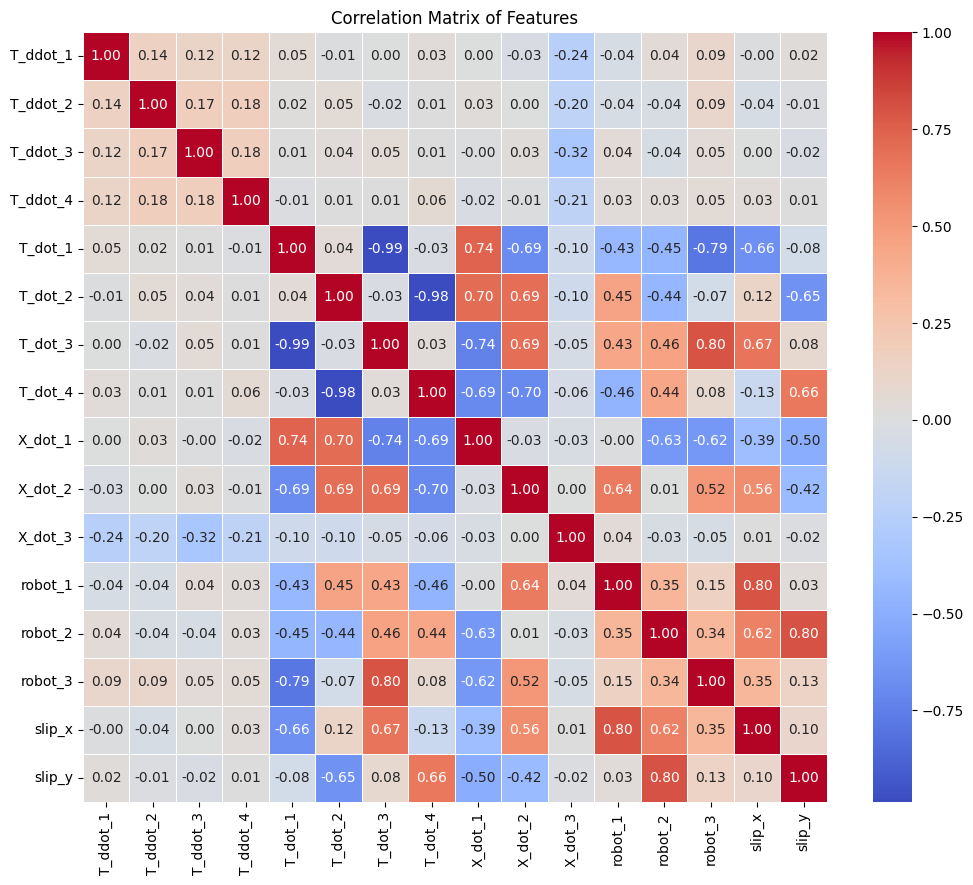

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the correlation_matrix is already calculated and available

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

#Sliding window

In [11]:
import numpy as np
def create_sliding_windows(data, window_size):
    """
    Creates sliding windows of the data.
    """
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data.iloc[i:(i + window_size)].values)
    return np.array(windows)

# Define the window size
window_size = 5

X_data_for_windows = df.drop(['slip_x', 'slip_y'], axis=1)
y_data_for_windows = df[['slip_x', 'slip_y']]

# Create windows for features
X_windows = create_sliding_windows(X_data_for_windows, window_size)

y_windows = y_data_for_windows.iloc[window_size - 1:].values


print(f"Created {len(X_windows)} windows of size {window_size}.")
print("Shape of X_windows:", X_windows.shape)
print("Shape of y_windows:", y_windows.shape)



Created 1828 windows of size 5.
Shape of X_windows: (1828, 5, 14)
Shape of y_windows: (1828, 2)


#1.Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data splitting complete.
Shape of X_train: (1462, 5, 14)
Shape of X_val: (183, 5, 14)
Shape of X_test: (183, 5, 14)
Shape of y_train: (1462, 2)
Shape of y_val: (183, 2)
Shape of y_test: (183, 2)


#2.Normalize

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for reshaping

# Scale the features
scaler = StandardScaler()

n_train_samples = X_train.shape[0]
n_val_samples = X_val.shape[0]
n_test_samples = X_test.shape[0]
n_features_per_timestep = X_train.shape[-1] # Number of features at each timestep

X_train_reshaped_2d_for_scaling = X_train.reshape(n_train_samples, -1)
X_val_reshaped_2d_for_scaling = X_val.reshape(n_val_samples, -1)
X_test_reshaped_2d_for_scaling = X_test.reshape(n_test_samples, -1)

X_train_scaled = scaler.fit_transform(X_train_reshaped_2d_for_scaling)
X_val_scaled = scaler.transform(X_val_reshaped_2d_for_scaling)
X_test_scaled = scaler.transform(X_test_reshaped_2d_for_scaling)


n_timesteps = window_size
n_features_3d = n_features_per_timestep


X_train_scaled_3d = X_train_scaled.reshape((n_train_samples, n_timesteps, n_features_3d))
X_val_scaled_3d = X_val_scaled.reshape((n_val_samples, n_timesteps, n_features_3d))
X_test_scaled_3d = X_test_scaled.reshape((n_test_samples, n_timesteps, n_features_3d))



print("Data splitting and scaling complete.")
print(f"Shape of X_train_scaled (2D, flattened windows): {X_train_scaled.shape}")
print(f"Shape of X_val_scaled (2D, flattened windows): {X_val_scaled.shape}")
print(f"Shape of X_test_scaled (2D, flattened windows): {X_test_scaled.shape}")
print(f"Shape of X_train_scaled_3d (3D, for LSTM/CNN): {X_train_scaled_3d.shape}")
print(f"Shape of X_val_scaled_3d (3D, for LSTM/CNN): {X_val_scaled_3d.shape}")
print(f"Shape of X_test_scaled_3d (3D, for LSTM/CNN): {X_test_scaled_3d.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data splitting and scaling complete.
Shape of X_train_scaled (2D, flattened windows): (1462, 70)
Shape of X_val_scaled (2D, flattened windows): (183, 70)
Shape of X_test_scaled (2D, flattened windows): (183, 70)
Shape of X_train_scaled_3d (3D, for LSTM/CNN): (1462, 5, 14)
Shape of X_val_scaled_3d (3D, for LSTM/CNN): (183, 5, 14)
Shape of X_test_scaled_3d (3D, for LSTM/CNN): (183, 5, 14)
Shape of y_train: (1462, 2)
Shape of y_val: (183, 2)
Shape of y_test: (183, 2)


#Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print("Training Linear Regression model...")


model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training complete.")


y_pred = model.predict(X_test_scaled)

rmse_x = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
mse_x = mean_squared_error(y_test[:, 0], y_pred[:, 0])
r2_x = r2_score(y_test[:, 0], y_pred[:, 0])
mae_x = mean_absolute_error(y_test[:, 0], y_pred[:, 0])


print("\n--- Evaluation Results for Slip X (Linear Regression) ---")
print(f"RMSE: {rmse_x:.4f}")
print(f"MSE: {mse_x:.4f}")
print(f"R2 Score: {r2_x:.4f}")
print(f"MAE: {mae_x:.4f}")

rmse_y = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
mse_y = mean_squared_error(y_test[:, 1], y_pred[:, 1])
r2_y = r2_score(y_test[:, 1], y_pred[:, 1])
mae_y = mean_absolute_error(y_test[:, 1], y_pred[:, 1])


print("\n--- Evaluation Results for Slip Y (Linear Regression) ---")
print(f"RMSE: {rmse_y:.4f}")
print(f"MSE: {mse_y:.4f}")
print(f"R2 Score: {r2_y:.4f}")
print(f"MAE: {mae_y:.4f}")

Training Linear Regression model...
Model training complete.

--- Evaluation Results for Slip X (Linear Regression) ---
RMSE: 0.0067
MSE: 0.0000
R2 Score: 0.8471
MAE: 0.0050

--- Evaluation Results for Slip Y (Linear Regression) ---
RMSE: 0.0090
MSE: 0.0001
R2 Score: 0.8588
MAE: 0.0067


#Polynomial regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print("Applying Polynomial Regression...")

# Define the degree of the polynomial
degree = 2

poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_scaled)

X_test_poly = poly_features.transform(X_test_scaled)

print(f"Shape of X_train_poly: {X_train_poly.shape}")
print(f"Shape of X_test_poly: {X_test_poly.shape}")


print("\nTraining Polynomial Regression model for 'slip_x'...")
model_poly_x = LinearRegression()
model_poly_x.fit(X_train_poly, y_train[:, 0])
print("Model training complete for 'slip_x'.")

y_pred_x_poly = model_poly_x.predict(X_test_poly)

rmse_x_poly = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_x_poly))
mse_x_poly = mean_squared_error(y_test[:, 0], y_pred_x_poly)
r2_x_poly = r2_score(y_test[:, 0], y_pred_x_poly)
mae_x_poly = mean_absolute_error(y_test[:, 0], y_pred_x_poly)


print("\n--- Evaluation Results for Slip X (Polynomial Regression) ---")
print(f"RMSE: {rmse_x_poly:.4f}")
print(f"MSE: {mse_x_poly:.4f}")
print(f"R2 Score: {r2_x_poly:.4f}")
print(f"MAE: {mae_x_poly:.4f}")


print("\nTraining Polynomial Regression model for 'slip_y'...")
model_poly_y = LinearRegression()
model_poly_y.fit(X_train_poly, y_train[:, 1])
print("Model training complete for 'slip_y'.")

y_pred_y_poly = model_poly_y.predict(X_test_poly)

rmse_y_poly = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_y_poly))
mse_y_poly = mean_squared_error(y_test[:, 1], y_pred_y_poly)
r2_y_poly = r2_score(y_test[:, 1], y_pred_y_poly)
mae_y_poly = mean_absolute_error(y_test[:, 1], y_pred_y_poly)


print("\n--- Evaluation Results for Slip Y (Polynomial Regression) ---")
print(f"RMSE: {rmse_y_poly:.4f}")
print(f"MSE: {mse_y_poly:.4f}")
print(f"R2 Score: {r2_y_poly:.4f}")
print(f"MAE: {mae_y_poly:.4f}")

Applying Polynomial Regression...
Shape of X_train_poly: (1462, 2556)
Shape of X_test_poly: (183, 2556)

Training Polynomial Regression model for 'slip_x'...
Model training complete for 'slip_x'.

--- Evaluation Results for Slip X (Polynomial Regression) ---
RMSE: 0.0129
MSE: 0.0002
R2 Score: 0.4300
MAE: 0.0065

Training Polynomial Regression model for 'slip_y'...
Model training complete for 'slip_y'.

--- Evaluation Results for Slip Y (Polynomial Regression) ---
RMSE: 0.0160
MSE: 0.0003
R2 Score: 0.5477
MAE: 0.0082


#GPR

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

print("Training Gaussian Process Regression model...")


kernel = CK(1.0, (1e-5, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-7, 1e-1))


gpr_x = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr_x.fit(X_train_scaled, y_train[:, 0])

y_pred_x_gpr = gpr_x.predict(X_test_scaled)

rmse_x_gpr = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_x_gpr))
mse_x_gpr = mean_squared_error(y_test[:, 0], y_pred_x_gpr)
r2_x_gpr = r2_score(y_test[:, 0], y_pred_x_gpr)
mae_x_gpr = mean_absolute_error(y_test[:, 0], y_pred_x_gpr)


print("\n--- Evaluation Results for Slip X (GPR) ---")
print(f"RMSE: {rmse_x_gpr:.6f}")
print(f"MSE: {mse_x_gpr:.6f}")
print(f"R2 Score: {r2_x_gpr:.4f}")
print(f"MAE: {mae_x_gpr:.6f}")

gpr_y = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr_y.fit(X_train_scaled, y_train[:, 1])

y_pred_y_gpr = gpr_y.predict(X_test_scaled)

rmse_y_gpr = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_y_gpr))
mse_y_gpr = mean_squared_error(y_test[:, 1], y_pred_y_gpr)
r2_y_gpr = r2_score(y_test[:, 1], y_pred_y_gpr)
mae_y_gpr = mean_absolute_error(y_test[:, 1], y_pred_y_gpr)


print("\n--- Evaluation Results for Slip Y (GPR) ---")
print(f"RMSE: {rmse_y_gpr:.6f}")
print(f"MSE: {mse_y_gpr:.6f}")
print(f"R2 Score: {r2_y_gpr:.4f}")
print(f"MAE: {mae_y_gpr:.6f}")

Training Gaussian Process Regression model...

--- Evaluation Results for Slip X (GPR) ---
RMSE: 0.004405
MSE: 0.000019
R2 Score: 0.9335
MAE: 0.002661

--- Evaluation Results for Slip Y (GPR) ---
RMSE: 0.006707
MSE: 0.000045
R2 Score: 0.9209
MAE: 0.003764


#SVR(linear,polynomial,RBF)

In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

kernels = ['poly', 'rbf', 'linear']
degree = 3 # For polynomial kernel
results_x = {}
results_y = {}


for kernel in kernels:
    print(f"Training SVR with {kernel} kernel...")

    if kernel == 'poly':
        svr_x = SVR(kernel=kernel, degree=degree, C=1.0, epsilon=0.1, coef0=0.0)
    else:
        svr_x = SVR(kernel=kernel, C=1.0, epsilon=0.1)

    svr_x.fit(X_train_scaled, y_train[:, 0])

    y_pred_x = svr_x.predict(X_test_scaled)

    rmse_x = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_x))
    mse_x = mean_squared_error(y_test[:, 0], y_pred_x)
    r2_x = r2_score(y_test[:, 0], y_pred_x)
    mae_x = mean_absolute_error(y_test[:, 0], y_pred_x)


    results_x[kernel] = {'RMSE': rmse_x, 'MSE': mse_x, 'R2': r2_x, 'MAE': mae_x}

    if kernel == 'poly':
        svr_y = SVR(kernel=kernel, degree=degree, C=1.0, epsilon=0.1, coef0=0.0)
    else:
        svr_y = SVR(kernel=kernel, C=1.0, epsilon=0.1)

    svr_y.fit(X_train_scaled, y_train[:, 1])

    y_pred_y = svr_y.predict(X_test_scaled)


    rmse_y = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_y))
    mse_y = mean_squared_error(y_test[:, 1], y_pred_y)
    r2_y = r2_score(y_test[:, 1], y_pred_y)
    mae_y = mean_absolute_error(y_test[:, 1], y_pred_y)

    results_y[kernel] = {'RMSE': rmse_y, 'MSE': mse_y, 'R2': r2_y, 'MAE': mae_y}

print("\n--- Evaluation Results for Slip X ---")
for kernel, metrics in results_x.items():
    print(f"Kernel: {kernel}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2 Score: {metrics['R2']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")


print("\n--- Evaluation Results for Slip Y ---")
for kernel, metrics in results_y.items():
    print(f"Kernel: {kernel}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2 Score: {metrics['R2']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")

Training SVR with poly kernel...
Training SVR with rbf kernel...
Training SVR with linear kernel...

--- Evaluation Results for Slip X ---
Kernel: poly
  RMSE: 0.0176
  MSE: 0.0003
  R2 Score: -0.0600
  MAE: 0.0151
Kernel: rbf
  RMSE: 0.0176
  MSE: 0.0003
  R2 Score: -0.0600
  MAE: 0.0151
Kernel: linear
  RMSE: 0.0176
  MSE: 0.0003
  R2 Score: -0.0600
  MAE: 0.0151

--- Evaluation Results for Slip Y ---
Kernel: poly
  RMSE: 0.0259
  MSE: 0.0007
  R2 Score: -0.1781
  MAE: 0.0240
Kernel: rbf
  RMSE: 0.0259
  MSE: 0.0007
  R2 Score: -0.1781
  MAE: 0.0240
Kernel: linear
  RMSE: 0.0259
  MSE: 0.0007
  R2 Score: -0.1781
  MAE: 0.0240


#Tuned SVR

##Polynomial kernel

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error
import numpy as np


param_grid_poly = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'C': [0.01, 0.1,1],
    'epsilon': [ 0.01, 0.1],
    'coef0': [0.0, 0.1, 1]
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

print("Performing Grid Search for SVR with Polynomial Kernel for 'slip_x'...")
grid_search_x_poly = GridSearchCV(SVR(), param_grid_poly, cv=5, scoring=mse_scorer, n_jobs=-1)

grid_search_x_poly.fit(X_train_scaled, y_train[:, 0])

print("\nBest parameters for 'slip_x' (Polynomial Kernel):", grid_search_x_poly.best_params_)
print("Best cross-validation score (negative MSE) for 'slip_x' (Polynomial Kernel):", grid_search_x_poly.best_score_)

best_svr_x_poly = grid_search_x_poly.best_estimator_
y_pred_x_poly_tuned = best_svr_x_poly.predict(X_test_scaled)

rmse_x_poly_tuned = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_x_poly_tuned))
mse_x_poly_tuned = mean_squared_error(y_test[:, 0], y_pred_x_poly_tuned)
r2_x_poly_tuned = r2_score(y_test[:, 0], y_pred_x_poly_tuned)
mae_x_poly_tuned = mean_absolute_error(y_test[:, 0], y_pred_x_poly_tuned)


print("\nEvaluation of the best Polynomial SVR model on the test set for 'slip_x':")
print(f"  RMSE: {rmse_x_poly_tuned:.6f}")
print(f"  MSE: {mse_x_poly_tuned:.6f}")
print(f"  R2 Score: {r2_x_poly_tuned:.4f}")
print(f"  MAE: {mae_x_poly_tuned:.6f}")


print("\nPerforming Grid Search for SVR with Polynomial Kernel for 'slip_y'...")
grid_search_y_poly = GridSearchCV(SVR(), param_grid_poly, cv=5, scoring=mse_scorer, n_jobs=-1)

grid_search_y_poly.fit(X_train_scaled, y_train[:, 1])

print("\nBest parameters for 'slip_y' (Polynomial Kernel):", grid_search_y_poly.best_params_)
print("Best cross-validation score (negative MSE) for 'slip_y' (Polynomial Kernel):", grid_search_y_poly.best_score_)

best_svr_y_poly = grid_search_y_poly.best_estimator_
y_pred_y_poly_tuned = best_svr_y_poly.predict(X_test_scaled)

rmse_y_poly_tuned = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_y_poly_tuned))
mse_y_poly_tuned = mean_squared_error(y_test[:, 1], y_pred_y_poly_tuned)
r2_y_poly_tuned = r2_score(y_test[:, 1], y_pred_y_poly_tuned)
mae_y_poly_tuned = mean_absolute_error(y_test[:, 1], y_pred_y_poly_tuned)

print("\nEvaluation of the best Polynomial SVR model on the test set for 'slip_y':")
print(f"  RMSE: {rmse_y_poly_tuned:.6f}")
print(f"  MSE: {mse_y_poly_tuned:.6f}")
print(f"R2 Score: {r2_y_poly_tuned:.4f}")
print(f"  MAE: {mae_y_poly_tuned:.6f}")

best_svr_x_poly_tuned = best_svr_x_poly
best_svr_y_poly_tuned = best_svr_y_poly

Performing Grid Search for SVR with Polynomial Kernel for 'slip_x'...

Best parameters for 'slip_x' (Polynomial Kernel): {'C': 1, 'coef0': 1, 'degree': 3, 'epsilon': 0.01, 'kernel': 'poly'}
Best cross-validation score (negative MSE) for 'slip_x' (Polynomial Kernel): -5.951022196055023e-05

Evaluation of the best Polynomial SVR model on the test set for 'slip_x':
  RMSE: 0.007387
  MSE: 0.000055
  R2 Score: 0.8131
  MAE: 0.006540

Performing Grid Search for SVR with Polynomial Kernel for 'slip_y'...

Best parameters for 'slip_y' (Polynomial Kernel): {'C': 1, 'coef0': 0.1, 'degree': 2, 'epsilon': 0.01, 'kernel': 'poly'}
Best cross-validation score (negative MSE) for 'slip_y' (Polynomial Kernel): -7.741750350381435e-05

Evaluation of the best Polynomial SVR model on the test set for 'slip_y':
  RMSE: 0.008468
  MSE: 0.000072
R2 Score: 0.8739
  MAE: 0.007568


Tuned Linear SVR models not available. Skipping residual plots for Linear SVR.


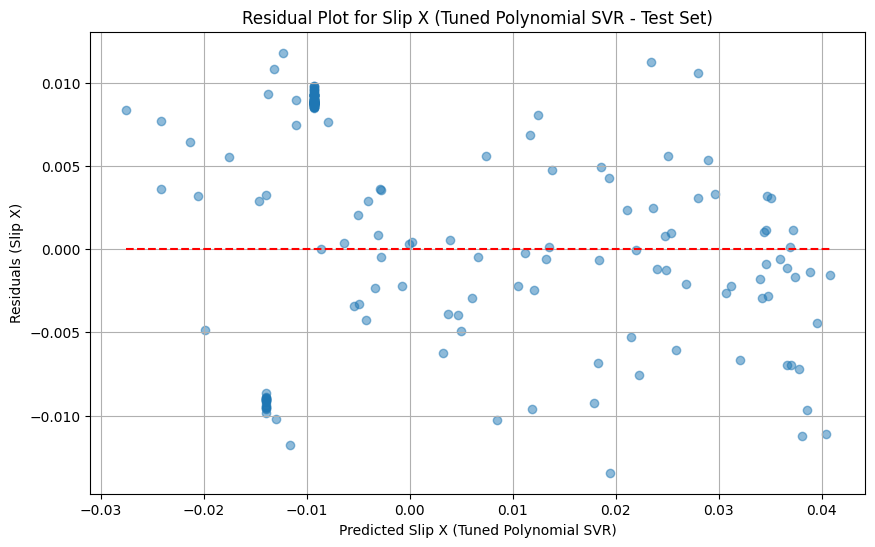

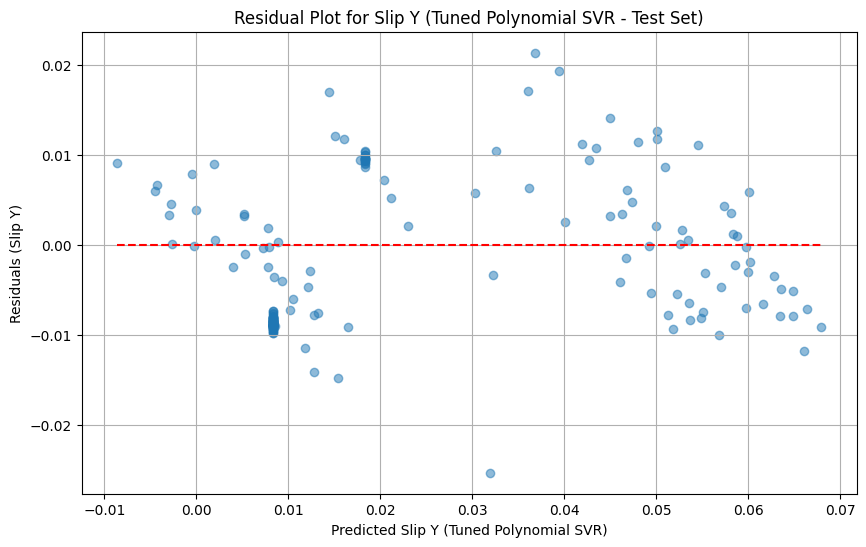

Generating Q-Q plots for Slip X residuals (Tuned Polynomial SVR)...


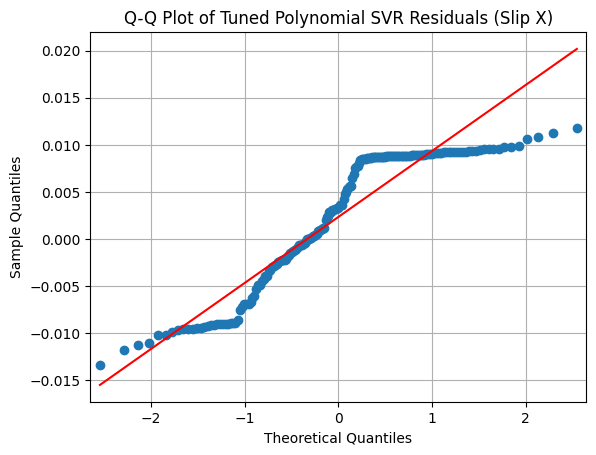


Generating Q-Q plots for Slip Y residuals (Tuned Polynomial SVR)...


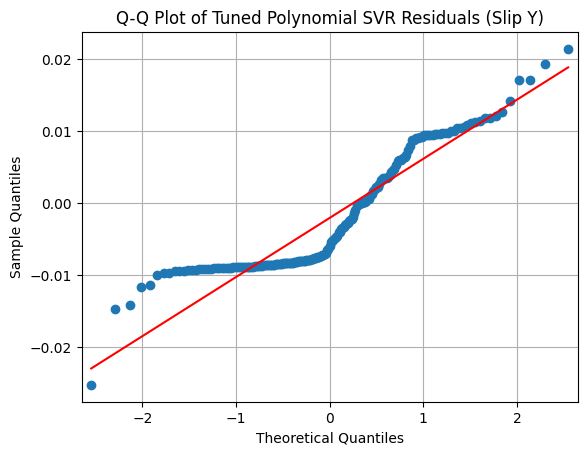

Tuned RBF SVR models not available. Skipping residual plots for RBF SVR.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

if 'best_svr_x_linear_tuned' in locals() and 'best_svr_y_linear_tuned' in locals():
    y_pred_x_linear_tuned = best_svr_x_linear_tuned.predict(X_test_scaled)
    y_pred_y_linear_tuned = best_svr_y_linear_tuned.predict(X_test_scaled)

    residuals_x_linear_tuned = y_test[:, 0] - y_pred_x_linear_tuned
    residuals_y_linear_tuned = y_test[:, 1] - y_pred_y_linear_tuned

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_x_linear_tuned, residuals_x_linear_tuned, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_x_linear_tuned.min(), xmax=y_pred_x_linear_tuned.max(), colors='r', linestyles='--')
    plt.xlabel("Predicted Slip X (Tuned Linear SVR)")
    plt.ylabel("Residuals (Slip X)")
    plt.title("Residual Plot for Slip X (Tuned Linear SVR - Test Set)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_y_linear_tuned, residuals_y_linear_tuned, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_y_linear_tuned.min(), xmax=y_pred_y_linear_tuned.max(), colors='r', linestyles='--')
    plt.xlabel("Predicted Slip Y (Tuned Linear SVR)")
    plt.ylabel("Residuals (Slip Y)")
    plt.title("Residual Plot for Slip Y (Tuned Linear SVR - Test Set)")
    plt.grid(True)
    plt.show()

    print("Generating Q-Q plots for Slip X residuals (Tuned Linear SVR)...")
    sm.qqplot(residuals_x_linear_tuned, line='s', ax=plt.gca())
    plt.title('Q-Q Plot of Tuned Linear SVR Residuals (Slip X)')
    plt.grid(True)
    plt.show()

    print("\nGenerating Q-Q plots for Slip Y residuals (Tuned Linear SVR)...")
    sm.qqplot(residuals_y_linear_tuned, line='s', ax=plt.gca())
    plt.title('Q-Q Plot of Tuned Linear SVR Residuals (Slip Y)')
    plt.grid(True)
    plt.show()

else:
    print("Tuned Linear SVR models not available. Skipping residual plots for Linear SVR.")


if 'best_svr_x_poly_tuned' in locals() and 'best_svr_y_poly_tuned' in locals():
    y_pred_x_poly_tuned = best_svr_x_poly_tuned.predict(X_test_scaled)
    y_pred_y_poly_tuned = best_svr_y_poly_tuned.predict(X_test_scaled)

    residuals_x_poly_tuned = y_test[:, 0] - y_pred_x_poly_tuned
    residuals_y_poly_tuned = y_test[:, 1] - y_pred_y_poly_tuned

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_x_poly_tuned, residuals_x_poly_tuned, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_x_poly_tuned.min(), xmax=y_pred_x_poly_tuned.max(), colors='r', linestyles='--')
    plt.xlabel("Predicted Slip X (Tuned Polynomial SVR)")
    plt.ylabel("Residuals (Slip X)")
    plt.title("Residual Plot for Slip X (Tuned Polynomial SVR - Test Set)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_y_poly_tuned, residuals_y_poly_tuned, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_y_poly_tuned.min(), xmax=y_pred_y_poly_tuned.max(), colors='r', linestyles='--')
    plt.xlabel("Predicted Slip Y (Tuned Polynomial SVR)")
    plt.ylabel("Residuals (Slip Y)")
    plt.title("Residual Plot for Slip Y (Tuned Polynomial SVR - Test Set)")
    plt.grid(True)
    plt.show()

    print("Generating Q-Q plots for Slip X residuals (Tuned Polynomial SVR)...")
    sm.qqplot(residuals_x_poly_tuned, line='s', ax=plt.gca())
    plt.title('Q-Q Plot of Tuned Polynomial SVR Residuals (Slip X)')
    plt.grid(True)
    plt.show()

    print("\nGenerating Q-Q plots for Slip Y residuals (Tuned Polynomial SVR)...")
    sm.qqplot(residuals_y_poly_tuned, line='s', ax=plt.gca())
    plt.title('Q-Q Plot of Tuned Polynomial SVR Residuals (Slip Y)')
    plt.grid(True)
    plt.show()

else:
    print("Tuned Polynomial SVR models not available. Skipping residual plots for Polynomial SVR.")

if 'best_svr_x_rbf_tuned' in locals() and 'best_svr_y_rbf_tuned' in locals():
    y_pred_x_rbf_tuned = best_svr_x_rbf_tuned.predict(X_test_scaled)
    y_pred_y_rbf_tuned = best_svr_y_rbf_tuned.predict(X_test_scaled)

    residuals_x_rbf_tuned = y_test[:, 0] - y_pred_x_rbf_tuned
    residuals_y_rbf_tuned = y_test[:, 1] - y_pred_y_rbf_tuned

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_x_rbf_tuned, residuals_x_rbf_tuned, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_x_rbf_tuned.min(), xmax=y_pred_x_rbf_tuned.max(), colors='r', linestyles='--')
    plt.xlabel("Predicted Slip X (Tuned RBF SVR)")
    plt.ylabel("Residuals (Slip X)")
    plt.title("Residual Plot for Slip X (Tuned RBF SVR - Test Set)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_y_rbf_tuned, residuals_y_rbf_tuned, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_y_rbf_tuned.min(), xmax=y_pred_y_rbf_tuned.max(), colors='r', linestyles='--')
    plt.xlabel("Predicted Slip Y (Tuned RBF SVR)")
    plt.ylabel("Residuals (Slip Y)")
    plt.title("Residual Plot for Slip Y (Tuned RBF SVR - Test Set)")
    plt.grid(True)
    plt.show()

    # Q-Q plots for Slip X and Y (Tuned RBF SVR)
    print("Generating Q-Q plots for Slip X residuals (Tuned RBF SVR)...")
    sm.qqplot(residuals_x_rbf_tuned, line='s', ax=plt.gca())
    plt.title('Q-Q Plot of Tuned RBF SVR Residuals (Slip X)')
    plt.grid(True)
    plt.show()

    print("\nGenerating Q-Q plots for Slip Y residuals (Tuned RBF SVR)...")
    sm.qqplot(residuals_y_rbf_tuned, line='s', ax=plt.gca())
    plt.title('Q-Q Plot of Tuned RBF SVR Residuals (Slip Y)')
    plt.grid(True)
    plt.show()

else:
    print("Tuned RBF SVR models not available. Skipping residual plots for RBF SVR.")

##RBF kernel

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error
import numpy as np


param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

print("Performing Grid Search for SVR with RBF Kernel for 'slip_x'...")
grid_search_x_rbf = GridSearchCV(SVR(), param_grid_rbf, cv=5, scoring=mse_scorer, n_jobs=-1)

grid_search_x_rbf.fit(X_train_scaled, y_train[:, 0])

print("\nBest parameters for 'slip_x' (RBF Kernel):", grid_search_x_rbf.best_params_)
print("Best cross-validation score (negative MSE) for 'slip_x' (RBF Kernel):", grid_search_x_rbf.best_score_)

best_svr_x_rbf = grid_search_x_rbf.best_estimator_
y_pred_x_rbf_tuned = best_svr_x_rbf.predict(X_test_scaled)

rmse_x_rbf_tuned = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_x_rbf_tuned))
mse_x_rbf_tuned = mean_squared_error(y_test[:, 0], y_pred_x_rbf_tuned)
r2_x_rbf_tuned = r2_score(y_test[:, 0], y_pred_x_rbf_tuned)
mae_x_rbf_tuned = mean_absolute_error(y_test[:, 0], y_pred_x_rbf_tuned)

print("\nEvaluation of the best RBF SVR model on the test set for 'slip_x':")
print(f"  RMSE: {rmse_x_rbf_tuned:.6f}")
print(f"  MSE: {mse_x_rbf_tuned:.6f}")
print(f"  R2 Score: {r2_x_rbf_tuned:.4f}")
print(f"  MAE: {mae_x_rbf_tuned:.6f}")


print("\nPerforming Grid Search for SVR with RBF Kernel for 'slip_y'...")

grid_search_y_rbf = GridSearchCV(SVR(), param_grid_rbf, cv=5, scoring=mse_scorer, n_jobs=-1)

grid_search_y_rbf.fit(X_train_scaled, y_train[:, 1])

print("\nBest parameters for 'slip_y' (RBF Kernel):", grid_search_y_rbf.best_params_)
print("Best cross-validation score (negative MSE) for 'slip_y' (RBF Kernel):", grid_search_y_rbf.best_score_)

best_svr_y_rbf = grid_search_y_rbf.best_estimator_
y_pred_y_rbf_tuned = best_svr_y_rbf.predict(X_test_scaled) # Use scaled X_test

rmse_y_rbf_tuned = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_y_rbf_tuned))
mse_y_rbf_tuned = mean_squared_error(y_test[:, 1], y_pred_y_rbf_tuned)
r2_y_rbf_tuned = r2_score(y_test[:, 1], y_pred_y_rbf_tuned)
mae_y_rbf_tuned = mean_absolute_error(y_test[:, 1], y_pred_y_rbf_tuned)

print("\nEvaluation of the best RBF SVR model on the test set for 'slip_y':")
print(f"  RMSE: {rmse_y_rbf_tuned:.6f}")
print(f"  MSE: {mse_y_rbf_tuned:.6f}")
print(f"R2 Score: {r2_y_rbf_tuned:.4f}")
print(f"  MAE: {mae_y_rbf_tuned:.6f}")

best_svr_x_rbf_tuned = best_svr_x_rbf
best_svr_y_rbf_tuned = best_svr_y_rbf

Performing Grid Search for SVR with RBF Kernel for 'slip_x'...

Best parameters for 'slip_x' (RBF Kernel): {'C': 1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score (negative MSE) for 'slip_x' (RBF Kernel): -6.807642656319475e-05

Evaluation of the best RBF SVR model on the test set for 'slip_x':
  RMSE: 0.008117
  MSE: 0.000066
  R2 Score: 0.7742
  MAE: 0.007335

Performing Grid Search for SVR with RBF Kernel for 'slip_y'...

Best parameters for 'slip_y' (RBF Kernel): {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score (negative MSE) for 'slip_y' (RBF Kernel): -7.615901825358313e-05

Evaluation of the best RBF SVR model on the test set for 'slip_y':
  RMSE: 0.008455
  MSE: 0.000071
R2 Score: 0.8743
  MAE: 0.007567


#MLP

#MLP=>Leaky RELU

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf


n_timesteps_mlp2 = X_train.shape[1]
n_features_per_timestep_mlp2 = X_train.shape[2]


model_mlp2 = Sequential()

# Custom weight
initializer_mlp2 = RandomUniform(minval=-0.6, maxval=0.6, seed=42)

# First hidden layer with Leaky ReLU
model_mlp2.add(Dense(128, input_shape=(n_timesteps_mlp2, n_features_per_timestep_mlp2), kernel_initializer=initializer_mlp2))
model_mlp2.add(LeakyReLU(alpha=0.01)) # Leaky ReLU activation
model_mlp2.add(Dropout(0.2)) # Adding dropout for regularization

# Second hidden layer with Linear activation
model_mlp2.add(Dense(64, kernel_initializer=initializer_mlp2))
model_mlp2.add(Dropout(0.2))

model_mlp2 = Sequential()

n_features_flattened = X_train_scaled.shape[1]

initializer_mlp2 = RandomUniform(minval=-0.6, maxval=0.6, seed=42)

model_mlp2.add(Dense(128, input_shape=(n_features_flattened,), kernel_initializer=initializer_mlp2))
model_mlp2.add(LeakyReLU(alpha=0.01))
model_mlp2.add(Dropout(0.2))

model_mlp2.add(Dense(64, kernel_initializer=initializer_mlp2))
model_mlp2.add(Dropout(0.2))

model_mlp2.add(Dense(y_train.shape[1], kernel_initializer=initializer_mlp2))

# Define the optimizer
optimizer_mlp2 = Adam(learning_rate=0.001)


model_mlp2.compile(optimizer=optimizer_mlp2, loss='mse')

print("Training MLP2 model...")
history_mlp2 = model_mlp2.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)
print("Training complete.")

y_pred_mlp2 = model_mlp2.predict(X_test_scaled)

rmse_x_mlp2 = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_mlp2[:, 0]))
mse_x_mlp2 = mean_squared_error(y_test[:, 0], y_pred_mlp2[:, 0])
r2_x_mlp2 = r2_score(y_test[:, 0], y_pred_mlp2[:, 0])
mae_x_mlp2 = mean_absolute_error(y_test[:, 0], y_pred_mlp2[:, 0])

print("\n--- Evaluation Results for Slip X (MLP2) ---")
print(f"RMSE: {rmse_x_mlp2:.4f}")
print(f"MSE: {mse_x_mlp2:.4f}")
print(f"R2 Score: {r2_x_mlp2:.4f}")
print(f"MAE: {mae_x_mlp2:.4f}")

rmse_y_mlp2 = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_mlp2[:, 1]))
mse_y_mlp2 = mean_squared_error(y_test[:, 1], y_pred_mlp2[:, 1])
r2_y_mlp2 = r2_score(y_test[:, 1], y_pred_mlp2[:, 1])
mae_y_mlp2 = mean_absolute_error(y_test[:, 1], y_pred_mlp2[:, 1])

print("\n--- Evaluation Results for Slip Y (MLP2) ---")
print(f"RMSE: {rmse_y_mlp2:.4f}")
print(f"MSE: {mse_y_mlp2:.4f}")
print(f"R2 Score: {r2_y_mlp2:.4f}")
print(f"MAE: {mae_y_mlp2:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training MLP2 model...
Epoch 1/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 670.7898 - val_loss: 71.5892
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 226.6169 - val_loss: 34.6353
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.6615 - val_loss: 23.7494
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 127.1215 - val_loss: 21.5126
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.6567 - val_loss: 12.4778
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.6915 - val_loss: 10.5371
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.7370 - val_loss: 7.3031
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.7721 - val_loss: 7.3831
Epoch 9/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.4588 - val_loss: 5.2730
Epoch 10/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.1396 - val_loss: 4.1052
Epoch 11/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.6119 - val_loss: 3.8680
Epoch 12/300
46/4

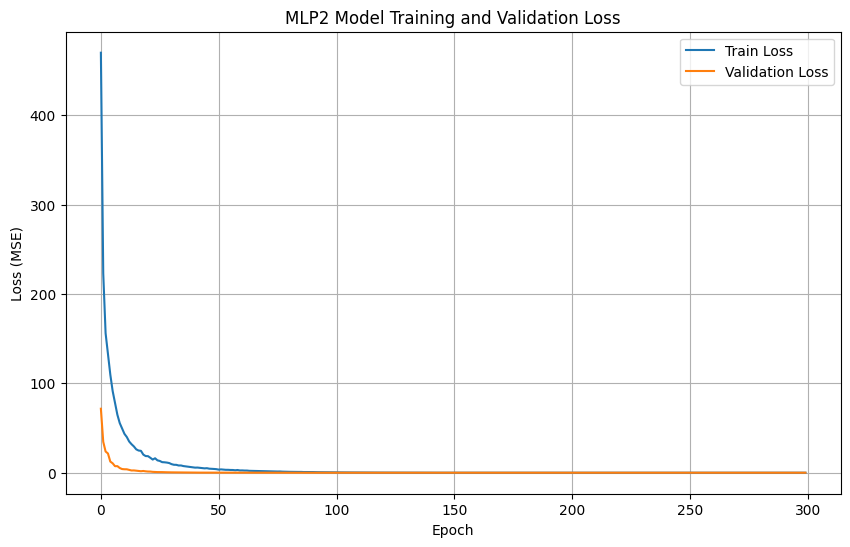

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_mlp2.history['loss'], label='Train Loss')
plt.plot(history_mlp2.history['val_loss'], label='Validation Loss')
plt.title('MLP2 Model Training and Validation Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

#NARX

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import LeakyReLU

narx_df = df.copy()
window_size = 5

for i in range(1, window_size + 1):
    narx_df[f'slip_x_lag_{i}'] = narx_df['slip_x'].shift(i)
    narx_df[f'slip_y_lag_{i}'] = narx_df['slip_y'].shift(i)

narx_df = narx_df.dropna()

X_narx = narx_df.drop(['slip_x', 'slip_y'], axis=1)
y_narx = narx_df[['slip_x', 'slip_y']]

n_timesteps = 1
n_features = X_narx.shape[1] # Total number of features including lagged ones

X_train_narx, X_test_narx, y_train_narx, y_test_narx = train_test_split(X_narx, y_narx, test_size=0.2, random_state=42)

scaler_narx = StandardScaler()
X_train_narx_scaled = scaler_narx.fit_transform(X_train_narx)

X_test_narx_scaled = scaler_narx.transform(X_test_narx)


X_train_reshaped_narx = X_train_narx_scaled.reshape((X_train_narx_scaled.shape[0], n_timesteps, n_features))
X_test_reshaped_narx = X_test_narx_scaled.reshape((X_test_narx_scaled.shape[0], n_timesteps, n_features))


# TWO-LAYER LSTM model for NARX
model_narx_2layer = Sequential()

model_narx_2layer.add(LSTM(64, input_shape=(n_timesteps, n_features), return_sequences=True))
model_narx_2layer.add(LeakyReLU(alpha=0.01)) #  LeakyReLU

model_narx_2layer.add(LSTM(128, activation='linear')) # Linear activation

model_narx_2layer.add(Dense(y_train_narx.shape[1]))

model_narx_2layer.compile(optimizer='adam', loss='mse')

print("\nTraining 2-layer NARX LSTM model...")
history_narx_2layer = model_narx_2layer.fit(X_train_reshaped_narx, y_train_narx, epochs=300, batch_size=32, validation_split=0.2, verbose=1)
print("Training complete.")

y_pred_narx_2layer = model_narx_2layer.predict(X_test_reshaped_narx)

r2_narx_2layer = r2_score(y_test_narx, y_pred_narx_2layer)
mse_narx_2layer = mean_squared_error(y_test_narx, y_pred_narx_2layer)
mae_narx_2layer = mean_absolute_error(y_test_narx, y_pred_narx_2layer)


print(f"\n2-Layer NARX LSTM Model R-squared: {r2_narx_2layer}")
print(f"2-Layer NARX LSTM Model Mean Squared Error (MSE): {mse_narx_2layer}")
print(f"2-Layer NARX LSTM Model Mean Absolute Error (MAE): {mae_narx_2layer}")


Training 2-layer NARX LSTM model...
Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.4674e-04 - val_loss: 1.1902e-05
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.7534e-06 - val_loss: 5.9193e-06
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4209e-06 - val_loss: 4.4618e-06
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1656e-06 - val_loss: 4.2229e-06
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6826e-06 - val_loss: 4.3549e-06
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7311e-06 - val_loss: 3.4757e-06
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4964e-06 - val_loss: 3.3074e-06
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1014e-06 - val_loss: 3.3028e-06
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0837e-06 - val_loss: 3.1892e-06
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1415e-06 - val_loss: 3.3222e-06
Epoch 11/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3699e-06 - val_l

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate the NARX model for 'slip_x'
rmse_x_narx = np.sqrt(mean_squared_error(y_test_narx['slip_x'], y_pred_narx_2layer[:, 0]))
mse_x_narx = mean_squared_error(y_test_narx['slip_x'], y_pred_narx_2layer[:, 0])
r2_x_narx = r2_score(y_test_narx['slip_x'], y_pred_narx_2layer[:, 0])

print("--- Evaluation Results for Slip X (NARX LSTM) ---")
print(f"RMSE: {rmse_x_narx:.6f}")
print(f"MSE: {mse_x_narx:.6f}")
print(f"R2 Score: {r2_x_narx:.4f}")

# Evaluate the NARX model for 'slip_y'
rmse_y_narx = np.sqrt(mean_squared_error(y_test_narx['slip_y'], y_pred_narx_2layer[:, 1]))
mse_y_narx = mean_squared_error(y_test_narx['slip_y'], y_pred_narx_2layer[:, 1])
r2_y_narx = r2_score(y_test_narx['slip_y'], y_pred_narx_2layer[:, 1])

print("\n--- Evaluation Results for Slip Y (NARX LSTM) ---")
print(f"RMSE: {rmse_y_narx:.6f}")
print(f"MSE: {mse_y_narx:.6f}")
print(f"R2 Score: {r2_y_narx:.4f}")

--- Evaluation Results for Slip X (NARX LSTM) ---
RMSE: 0.001464
MSE: 0.000002
R2 Score: 0.9924

--- Evaluation Results for Slip Y (NARX LSTM) ---
RMSE: 0.001451
MSE: 0.000002
R2 Score: 0.9963


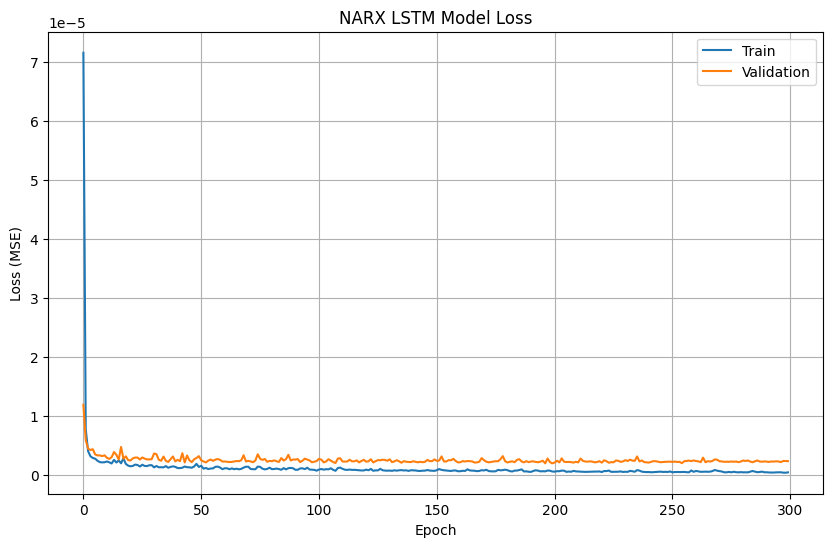

In [25]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history_narx_2layer.history['loss'])
plt.plot(history_narx_2layer.history['val_loss'])
plt.title('NARX LSTM Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

#LSTM

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.layers import LeakyReLU

n_features_lstm = X_windows.shape[-1]
n_timesteps_lstm = window_size


n_train_samples = X_train.shape[0]
n_val_samples = X_val.shape[0]
n_test_samples = X_test.shape[0]


X_train_reshaped_lstm = X_train.reshape((n_train_samples, n_timesteps_lstm, n_features_lstm))
X_val_reshaped_lstm = X_val.reshape((n_val_samples, n_timesteps_lstm, n_features_lstm))
X_test_reshaped_lstm = X_test.reshape((n_test_samples, n_timesteps_lstm, n_features_lstm))


print("Reshaped LSTM X_train shape:", X_train_reshaped_lstm.shape)
print("Reshaped LSTM X_val shape:", X_val_reshaped_lstm.shape)
print("Reshaped LSTM X_test shape:", X_test_reshaped_lstm.shape)


# TWO-LAYER LSTM model
model_lstm_2layer = Sequential()

# First LSTM layer
model_lstm_2layer.add(LSTM(32, input_shape=(n_timesteps_lstm, n_features_lstm), return_sequences=True))
model_lstm_2layer.add(LeakyReLU(alpha=0.01))
model_lstm_2layer.add(Dropout(0.2))

# Second LSTM layer
model_lstm_2layer.add(LSTM(64, activation='linear'))
model_lstm_2layer.add(Dropout(0.2))

# Output layer for slip_x and slip_y
model_lstm_2layer.add(Dense(y_train.shape[1]))

model_lstm_2layer.compile(optimizer='adam', loss='mse')

print("\nTraining 2-layer LSTM model...")
history_lstm_2layer = model_lstm_2layer.fit(X_train_reshaped_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val), verbose=1)
print("Training complete.")

y_pred_lstm_2layer = model_lstm_2layer.predict(X_test_reshaped_lstm)

rmse_x_lstm = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_lstm_2layer[:, 0]))
mse_x_lstm = mean_squared_error(y_test[:, 0], y_pred_lstm_2layer[:, 0])
r2_x_lstm = r2_score(y_test[:, 0], y_pred_lstm_2layer[:, 0])

print("\n--- Evaluation Results for Slip X (LSTM) ---")
print(f"RMSE: {rmse_x_lstm:.4f}")
print(f"MSE: {mse_x_lstm:.4f}")
print(f"R2 Score: {r2_x_lstm:.4f}")

rmse_y_lstm = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_lstm_2layer[:, 1]))
mse_y_lstm = mean_squared_error(y_test[:, 1], y_pred_lstm_2layer[:, 1])
r2_y_lstm = r2_score(y_test[:, 1], y_pred_lstm_2layer[:, 1])
print("\n--- Evaluation Results for Slip Y (LSTM) ---")
print(f"RMSE: {rmse_y_lstm:.4f}")
print(f"MSE: {mse_y_lstm:.4f}")
r2_y_lstm = r2_score(y_test[:, 1], y_pred_lstm_2layer[:, 1])
print(f"R2 Score: {r2_y_lstm:.4f}")

y_pred_lstm_2layer = y_pred_lstm_2layer

Reshaped LSTM X_train shape: (1462, 5, 14)
Reshaped LSTM X_val shape: (183, 5, 14)
Reshaped LSTM X_test shape: (183, 5, 14)

Training 2-layer LSTM model...
Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0020 - val_loss: 2.5708e-04
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.8216e-04 - val_loss: 1.7828e-04
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8148e-04 - val_loss: 1.4846e-04
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8853e-04 - val_loss: 1.5426e-04
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4250e-04 - val_loss: 1.3381e-04
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4492e-04 - val_loss: 1.3116e-04
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8980e-04 - val_loss: 1.2417e-04
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7013e-04 - val_loss: 1.1727e-04
Epoch 9/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6363e-04 - val_loss: 1.1882e-04
Epoch 10/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5083e-04 - val_loss: 1.1386e-04
Epoch 11/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5139e-04 - val

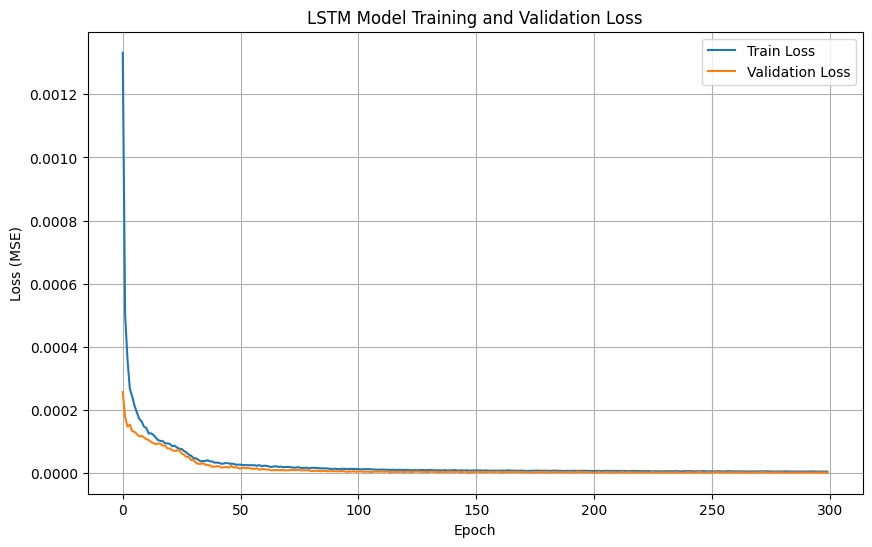

In [27]:
import matplotlib.pyplot as plt

# Assuming history_lstm_2layer is available from the LSTM training cell (pQPDZNA14XsJ)

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_lstm_2layer.history['loss'], label='Train Loss')
plt.plot(history_lstm_2layer.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training and Validation Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

#CNN-LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed

def build_cnn_lstm_model(timesteps, features):
    """
    Builds a CNN-LSTM model for time-series prediction.

    Args:
        timesteps (int): The number of time steps in each sample.
        features (int): The number of features in each time step.

    Returns:
        A compiled Keras Sequential model.
    """
    model = Sequential()

    # Convolutional layer to extract features from input sequences
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM layer to learn temporal dependencies
    model.add(LSTM(50, activation='relu'))

    #  Dense output layer
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


n_timesteps_cnn_lstm = window_size
n_features_cnn_lstm = X_windows.shape[-1]

n_train_samples = X_train.shape[0]
n_val_samples = X_val.shape[0]
n_test_samples = X_test.shape[0]


X_train_reshaped_cnn_lstm = X_train.reshape((n_train_samples, n_timesteps_cnn_lstm, n_features_cnn_lstm))
X_val_reshaped_cnn_lstm = X_val.reshape((n_val_samples, n_timesteps_cnn_lstm, n_features_cnn_lstm))
X_test_reshaped_cnn_lstm = X_test.reshape((n_test_samples, n_timesteps_cnn_lstm, n_features_cnn_lstm))

print("Reshaped CNN-LSTM X_train shape:", X_train_reshaped_cnn_lstm.shape)
print("Reshaped CNN-LSTM X_val shape:", X_val_reshaped_cnn_lstm.shape)
print("Reshaped CNN-LSTM X_test shape:", X_test_reshaped_cnn_lstm.shape)


model_cnn_lstm = Sequential()

model_cnn_lstm.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps_cnn_lstm, n_features_cnn_lstm)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Dropout(0.2))


model_cnn_lstm.add(LSTM(50, activation='relu')) # LSTM layer


# Output layer for slip_x and slip_y
model_cnn_lstm.add(Dense(y_train.shape[1]))

model_cnn_lstm.compile(optimizer='adam', loss='mse')

print("Training CNN-LSTM model...")
history_cnn_lstm = model_cnn_lstm.fit(X_train_reshaped_cnn_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_val_reshaped_cnn_lstm, y_val), verbose=1)
print("Training complete.")

y_pred_cnn_lstm = model_cnn_lstm.predict(X_test_reshaped_cnn_lstm)

rmse_x_cnn_lstm = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_cnn_lstm[:, 0]))
mse_x_cnn_lstm = mean_squared_error(y_test[:, 0], y_pred_cnn_lstm[:, 0])
r2_x_cnn_lstm = r2_score(y_test[:, 0], y_pred_cnn_lstm[:, 0])
mae_x_cnn_lstm = mean_absolute_error(y_test[:, 0], y_pred_cnn_lstm[:, 0])


print("\n--- Evaluation Results for Slip X (CNN-LSTM) ---")
print(f"RMSE: {rmse_x_cnn_lstm:.6f}")
print(f"MSE: {mse_x_cnn_lstm:.6f}")
print(f"R2 Score: {r2_x_cnn_lstm:.4f}")
print(f"MAE: {mae_x_cnn_lstm:.6f}")

# Evaluate the model for 'slip_y'
rmse_y_cnn_lstm = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_cnn_lstm[:, 1]))
mse_y_cnn_lstm = mean_squared_error(y_test[:, 1], y_pred_cnn_lstm[:, 1])
r2_y_cnn_lstm = r2_score(y_test[:, 1], y_pred_cnn_lstm[:, 1])
mae_y_cnn_lstm = mean_absolute_error(y_test[:, 1], y_pred_cnn_lstm[:, 1])

print("\n--- Evaluation Results for Slip Y (CNN-LSTM) ---")
print(f"RMSE: {rmse_y_cnn_lstm:.6f}")
print(f"MSE: {mse_y_cnn_lstm:.6f}")
print(f"R2 Score: {r2_y_cnn_lstm:.4f}")
print(f"MAE: {mae_y_cnn_lstm:.6f}")

# Store predictions for later use
y_pred_cnn_lstm = y_pred_cnn_lstm

Reshaped CNN-LSTM X_train shape: (1462, 5, 14)
Reshaped CNN-LSTM X_val shape: (183, 5, 14)
Reshaped CNN-LSTM X_test shape: (183, 5, 14)
Training CNN-LSTM model...
Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2187 - val_loss: 0.0140
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0211 - val_loss: 0.0042
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - val_loss: 0.0023
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - val_loss: 9.5865e-04
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - val_loss: 7.2982e-04
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 5.9308e-04
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 5.1780e-04
Epoch 9/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 4.6254e-04
Epoch 10/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.8224e-04 - val_loss: 4.2544e-04
Epoch 11/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 3.9809e-04
Epoch 12/300
46/46 ━━━━━━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step

--- Evaluation Results for Slip X (CNN-LSTM) ---
RMSE: 0.002923
MSE: 0.000009
R2 Score: 0.9707
MAE: 0.001821

--- Evaluation Results for Slip Y (CNN-LSTM) ---
RMSE: 0.002696
MSE: 0.000007
R2 Score: 0.9872
MAE: 0.001517


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming y_test and y_pred_cnn_lstm are available from the CNN-LSTM training cell (YGZ9-uj4CDre)

# Evaluate the CNN-LSTM model for 'slip_x'
rmse_x_cnn_lstm = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_cnn_lstm[:, 0]))
mse_x_cnn_lstm = mean_squared_error(y_test[:, 0], y_pred_cnn_lstm[:, 0])
r2_x_cnn_lstm = r2_score(y_test[:, 0], y_pred_cnn_lstm[:, 0])
mae_x_cnn_lstm = mean_absolute_error(y_test[:, 0], y_pred_cnn_lstm[:, 0])


print("--- Evaluation Results for Slip X (CNN-LSTM) ---")
print(f"RMSE: {rmse_x_cnn_lstm:.6f}")
print(f"MSE: {mse_x_cnn_lstm:.6f}")
print(f"R2 Score: {r2_x_cnn_lstm:.4f}")
print(f"MAE: {mae_x_cnn_lstm:.6f}")

# Evaluate the CNN-LSTM model for 'slip_y'
rmse_y_cnn_lstm = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_cnn_lstm[:, 1]))
mse_y_cnn_lstm = mean_squared_error(y_test[:, 1], y_pred_cnn_lstm[:, 1])
r2_y_cnn_lstm = r2_score(y_test[:, 1], y_pred_cnn_lstm[:, 1])
mae_y_cnn_lstm = mean_absolute_error(y_test[:, 1], y_pred_cnn_lstm[:, 1])

print("\n--- Evaluation Results for Slip Y (CNN-LSTM) ---")
print(f"RMSE: {rmse_y_cnn_lstm:.6f}")
print(f"MSE: {mse_y_cnn_lstm:.6f}")
print(f"R2 Score: {r2_y_cnn_lstm:.4f}")
print(f"MAE: {mae_y_cnn_lstm:.6f}")

--- Evaluation Results for Slip X (CNN-LSTM) ---
RMSE: 0.002923
MSE: 0.000009
R2 Score: 0.9707
MAE: 0.001821

--- Evaluation Results for Slip Y (CNN-LSTM) ---
RMSE: 0.002696
MSE: 0.000007
R2 Score: 0.9872
MAE: 0.001517


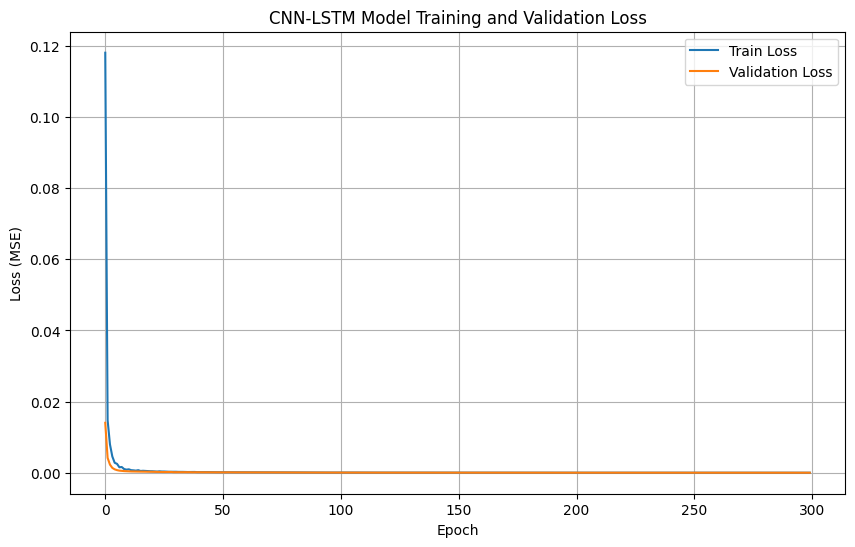

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history_cnn_lstm.history['loss'], label='Train Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Training and Validation Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

#CNN-LSTM-AutoEncoder

In [32]:
#m
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed, Flatten, Dropout
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import tensorflow as tf


n_timesteps_cnn_lstm_ae = window_size
n_features_cnn_lstm_ae = X_windows.shape[-1] # Use the number of features from the original windowed data

n_train_samples = X_train.shape[0]
n_val_samples = X_val.shape[0]
n_test_samples = X_test.shape[0]


X_train_reshaped_cnn_lstm_ae = X_train.reshape((n_train_samples, n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae))
X_val_reshaped_cnn_lstm_ae = X_val.reshape((n_val_samples, n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae))
X_test_reshaped_cnn_lstm_ae = X_test.reshape((n_test_samples, n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae))


print("Reshaped CNN-LSTM-Autoencoder X_train shape:", X_train_reshaped_cnn_lstm_ae.shape)
print("Reshaped CNN-LSTM-Autoencoder X_val shape:", X_val_reshaped_cnn_lstm_ae.shape)
print("Reshaped CNN-LSTM-Autoencoder X_test shape:", X_test_reshaped_cnn_lstm_ae.shape)


#  CNN-LSTM-Autoencoder
model_cnn_lstm_ae_slip = Sequential()

# Custom weight initializer
initializer_cnn_lstm_ae = RandomUniform(minval=-0.6, maxval=0.6, seed=42)

# Encoder (CNN layers)
model_cnn_lstm_ae_slip.add(Conv1D(filters=64, kernel_size=2, kernel_initializer=initializer_cnn_lstm_ae, input_shape=(n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae)))
model_cnn_lstm_ae_slip.add(LeakyReLU(alpha=0.01))
model_cnn_lstm_ae_slip.add(MaxPooling1D(pool_size=2))
model_cnn_lstm_ae_slip.add(Dropout(0.2))

model_cnn_lstm_ae_slip.add(Conv1D(filters=32, kernel_size=2, kernel_initializer=initializer_cnn_lstm_ae))
model_cnn_lstm_ae_slip.add(LeakyReLU(alpha=0.01))
model_cnn_lstm_ae_slip.add(Dropout(0.2))

# LSTM layer after CNN to process the resulting sequence
model_cnn_lstm_ae_slip.add(LSTM(50, activation='relu', kernel_initializer=initializer_cnn_lstm_ae)) # Process the encoded sequence

# Output layer for slip_x and slip_y with linear activation
model_cnn_lstm_ae_slip.add(Dense(y_train.shape[1], activation='linear', kernel_initializer=initializer_cnn_lstm_ae))


model_cnn_lstm_ae_slip.compile(optimizer='adam', loss='mse') # Using Mean Squared Error as loss

print("Training CNN-LSTM-Autoencoder (for slip prediction) model...")
history_cnn_lstm_ae = model_cnn_lstm_ae_slip.fit(X_train_reshaped_cnn_lstm_ae, y_train, epochs=300, batch_size=32, validation_data=(X_val_reshaped_cnn_lstm_ae, y_val), verbose=1)
print("Training complete.")

y_pred_cnn_lstm_ae = model_cnn_lstm_ae_slip.predict(X_test_reshaped_cnn_lstm_ae)

rmse_x_cnn_lstm_ae = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0]))
mse_x_cnn_lstm_ae = mean_squared_error(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0])
r2_x_cnn_lstm_ae = r2_score(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0])
mae_x_cnn_lstm_ae = mean_absolute_error(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0])


print("\n--- Evaluation Results for Slip X (CNN-LSTM-Autoencoder for slip prediction) ---")
print(f"RMSE: {rmse_x_cnn_lstm_ae:.6f}")
print(f"MSE: {mse_x_cnn_lstm_ae:.6f}")
print(f"R2 Score: {r2_x_cnn_lstm_ae:.4f}")
print(f"MAE: {mae_x_cnn_lstm_ae:.6f}")

# Evaluate the model for 'slip_y'
rmse_y_cnn_lstm_ae = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1]))
mse_y_cnn_lstm_ae = mean_squared_error(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1])
r2_y_cnn_lstm_ae = r2_score(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1])
mae_y_cnn_lstm_ae = mean_absolute_error(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1])

print("\n--- Evaluation Results for Slip Y (CNN-LSTM-Autoencoder for slip prediction) ---")
print(f"RMSE: {rmse_y_cnn_lstm_ae:.6f}")
print(f"MSE: {mse_y_cnn_lstm_ae:.6f}")
print(f"R2 Score: {r2_y_cnn_lstm_ae:.4f}")
print(f"MAE: {mae_y_cnn_lstm_ae:.6f}")

Reshaped CNN-LSTM-Autoencoder X_train shape: (1462, 5, 14)
Reshaped CNN-LSTM-Autoencoder X_val shape: (183, 5, 14)
Reshaped CNN-LSTM-Autoencoder X_test shape: (183, 5, 14)
Training CNN-LSTM-Autoencoder (for slip prediction) model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1180.2014 - val_loss: 275.0961
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 482.1199 - val_loss: 171.3294
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 338.1549 - val_loss: 128.7694
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 248.8770 - val_loss: 91.5790
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 167.2726 - val_loss: 70.6890
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149.7981 - val_loss: 57.1804
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 119.1798 - val_loss: 39.4215
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.0041 - val_loss: 31.2995
Epoch 9/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.5687 - val_loss: 23.5394
Epoch 10/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 67.2300 - val_loss: 17.6115
Epoch 11/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.0201 - val_loss: 13.0249
Epoch 12/300
46/46 ━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step

--- Evaluation Results for Slip X (CNN-LSTM-Autoencoder for slip prediction) ---
RMSE: 0.015117
MSE: 0.000229
R2 Score: 0.2170
MAE: 0.012513

--- Evaluation Results for Slip Y (CNN-LSTM-Autoencoder for slip prediction) ---
RMSE: 0.018945
MSE: 0.000359
R2 Score: 0.3690
MAE: 0.014833


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed, Flatten, Dropout, RepeatVector
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import tensorflow as tf


n_timesteps_cnn_lstm_ae = window_size
n_features_cnn_lstm_ae = X_windows.shape[-1]

n_train_samples = X_train.shape[0]
n_val_samples = X_val.shape[0]
n_test_samples = X_test.shape[0]


X_train_reshaped_cnn_lstm_ae = X_train.reshape((n_train_samples, n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae))
X_val_reshaped_cnn_lstm_ae = X_val.reshape((n_val_samples, n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae))
X_test_reshaped_cnn_lstm_ae = X_test.reshape((n_test_samples, n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae))


print("Reshaped CNN-LSTM-Autoencoder X_train shape:", X_train_reshaped_cnn_lstm_ae.shape)
print("Reshaped CNN-LSTM-Autoencoder X_val shape:", X_val_reshaped_cnn_lstm_ae.shape)
print("Reshaped CNN-LSTM-Autoencoder X_test shape:", X_test_reshaped_cnn_lstm_ae.shape)


# CNN-LSTM-Autoencoder
model_cnn_lstm_ae_slip = Sequential()

# Custom weight initializer
initializer_cnn_lstm_ae = RandomUniform(minval=-0.6, maxval=0.6, seed=42)

# --- Encoder ---
# Input Conv1D layer
model_cnn_lstm_ae_slip.add(Conv1D(filters=64, kernel_size=2, kernel_initializer=initializer_cnn_lstm_ae, activation='relu', input_shape=(n_timesteps_cnn_lstm_ae, n_features_cnn_lstm_ae)))
model_cnn_lstm_ae_slip.add(MaxPooling1D(pool_size=2))
model_cnn_lstm_ae_slip.add(Dropout(0.2))

# Second Conv1D layer
model_cnn_lstm_ae_slip.add(Conv1D(filters=32, kernel_size=2, kernel_initializer=initializer_cnn_lstm_ae, activation='relu'))
model_cnn_lstm_ae_slip.add(Dropout(0.2))

# LSTM layer
model_cnn_lstm_ae_slip.add(LSTM(64, activation='relu', kernel_initializer=initializer_cnn_lstm_ae))

# --- Decoder ---
# This part reconstructs the input
model_cnn_lstm_ae_slip.add(RepeatVector(n_timesteps_cnn_lstm_ae))  # Repeat the encoded vector to match the input time steps

# LSTM decoder layer
model_cnn_lstm_ae_slip.add(LSTM(128, activation='relu', return_sequences=True))

# Output Conv1D layer (TimeDistributed to apply the same Dense layer to each time step)
model_cnn_lstm_ae_slip.add(TimeDistributed(Dense(n_features_cnn_lstm_ae, activation='linear')))


model_cnn_lstm_ae_slip.compile(optimizer='adam', loss='mse') # Using Mean Squared Error as loss

print("Training CNN-LSTM-Autoencoder (for slip prediction) model...")
history_cnn_lstm_ae = model_cnn_lstm_ae_slip.fit(X_train_reshaped_cnn_lstm_ae, X_train_reshaped_cnn_lstm_ae, epochs=300, batch_size=32, validation_data=(X_val_reshaped_cnn_lstm_ae, X_val_reshaped_cnn_lstm_ae), verbose=1)
print("Training complete.")


X_test_reconstructed = model_cnn_lstm_ae_slip.predict(X_test_reshaped_cnn_lstm_ae)

# Evaluate the model for 'slip_x' and 'slip_y' prediction
y_pred_cnn_lstm_ae = model_cnn_lstm_ae_slip.predict(X_test_reshaped_cnn_lstm_ae)[:, -1, :] # Assuming the last timestep's output is the prediction

rmse_x_cnn_lstm_ae = np.sqrt(mean_squared_error(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0]))
mse_x_cnn_lstm_ae = mean_squared_error(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0])
r2_x_cnn_lstm_ae = r2_score(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0])
mae_x_cnn_lstm_ae = mean_absolute_error(y_test[:, 0], y_pred_cnn_lstm_ae[:, 0])


print("\n--- Evaluation Results for Slip X (CNN-LSTM-Autoencoder for slip prediction) ---")
print(f"RMSE: {rmse_x_cnn_lstm_ae:.6f}")
print(f"MSE: {mse_x_cnn_lstm_ae:.6f}")
print(f"R2 Score: {r2_x_cnn_lstm_ae:.4f}")
print(f"MAE: {mae_x_cnn_lstm_ae:.6f}")

# Evaluate the model for 'slip_y'
rmse_y_cnn_lstm_ae = np.sqrt(mean_squared_error(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1]))
mse_y_cnn_lstm_ae = mean_squared_error(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1])
r2_y_cnn_lstm_ae = r2_score(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1])
mae_y_cnn_lstm_ae = mean_absolute_error(y_test[:, 1], y_pred_cnn_lstm_ae[:, 1])

print("\n--- Evaluation Results for Slip Y (CNN-LSTM-Autoencoder for slip prediction) ---")
print(f"RMSE: {rmse_y_cnn_lstm_ae:.6f}")
print(f"MSE: {mse_y_cnn_lstm_ae:.6f}")
print(f"R2 Score: {r2_y_cnn_lstm_ae:.4f}")
print(f"MAE: {mae_y_cnn_lstm_ae:.6f}")

Reshaped CNN-LSTM-Autoencoder X_train shape: (1462, 5, 14)
Reshaped CNN-LSTM-Autoencoder X_val shape: (183, 5, 14)
Reshaped CNN-LSTM-Autoencoder X_test shape: (183, 5, 14)
Training CNN-LSTM-Autoencoder (for slip prediction) model...
Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 29.6353 - val_loss: 15.6680
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 16.4887 - val_loss: 15.0104
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 14.7355 - val_loss: 14.8140
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 13.4222 - val_loss: 14.7319
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 13.5040 - val_loss: 14.6543
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 13.4612 - val_loss: 14.5718
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 13.1280 - val_loss: 14.5372
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 13.2814 - val_loss: 14.5045
Epoch 9/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 13.1952 - val_loss: 14.4969
Epoch 10/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 12.7492 - val_loss: 14.4795
Epoch 11/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 13.7450 - val_loss: 14.3860
Epoch 12/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s

#Best model

#Residuals

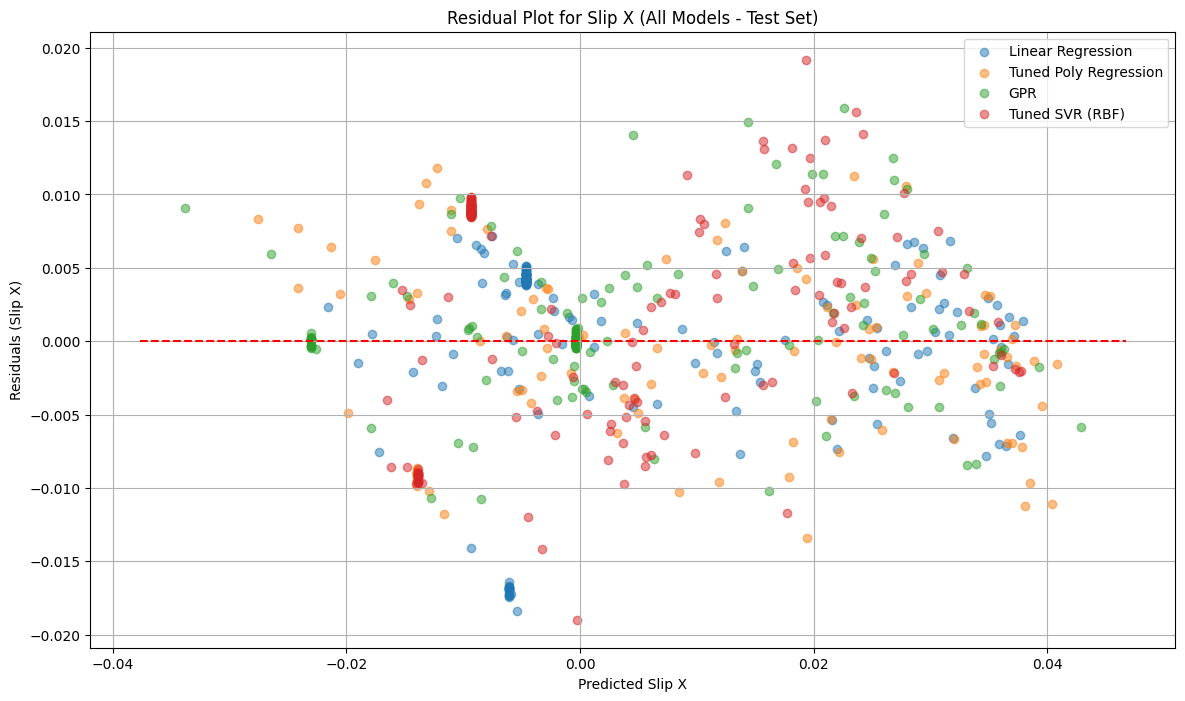

In [34]:
import matplotlib.pyplot as plt
import numpy as np


residuals_x_lr = y_test[:, 0] - y_pred[:, 0] #  Linear Regression
residuals_x_poly_tuned = y_test[:, 0] - y_pred_x_poly_tuned # Tuned Polynomial Regression
residuals_x_gpr = y_test[:, 0] - y_pred_x_gpr #  GPR
residuals_x_rbf_tuned = y_test[:, 0] - y_pred_x_rbf_tuned # Tuned SVR (RBF)

plt.figure(figsize=(14, 8))

plt.scatter(y_pred[:, 0], residuals_x_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_pred_x_poly_tuned, residuals_x_poly_tuned, alpha=0.5, label='Tuned Poly Regression')
plt.scatter(y_pred_x_gpr, residuals_x_gpr, alpha=0.5, label='GPR')
plt.scatter(y_pred_x_rbf_tuned, residuals_x_rbf_tuned, alpha=0.5, label='Tuned SVR (RBF)')

plt.hlines(y=0, xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors='r', linestyles='--')
plt.xlabel("Predicted Slip X")
plt.ylabel("Residuals (Slip X)")
plt.title("Residual Plot for Slip X (All Models - Test Set)")
plt.legend()
plt.grid(True)
plt.show()

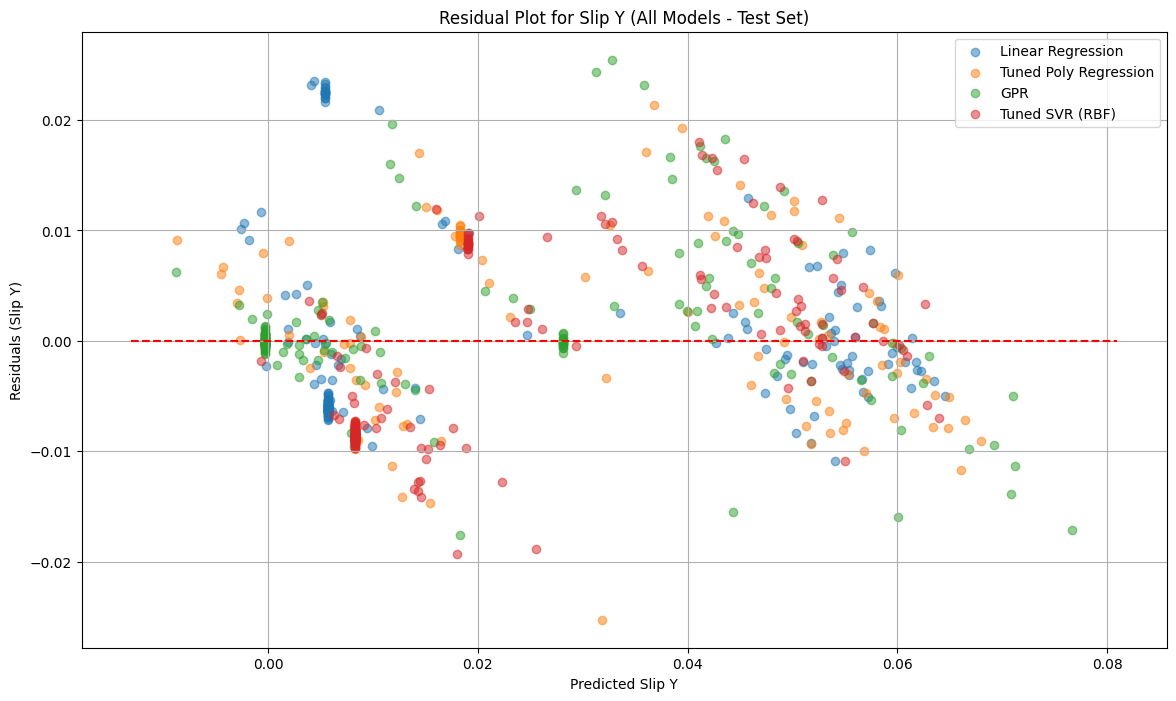

In [35]:
import matplotlib.pyplot as plt
import numpy as np


residuals_y_lr = y_test[:, 1] - y_pred[:, 1] #  Linear Regression
residuals_y_poly_tuned = y_test[:, 1] - y_pred_y_poly_tuned #Tuned Polynomial Regression
residuals_y_gpr = y_test[:, 1] - y_pred_y_gpr # GPR
residuals_y_rbf_tuned = y_test[:, 1] - y_pred_y_rbf_tuned #  Tuned SVR (RBF)


plt.figure(figsize=(14, 8))

plt.scatter(y_pred[:, 1], residuals_y_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_pred_y_poly_tuned, residuals_y_poly_tuned, alpha=0.5, label='Tuned Poly Regression')
plt.scatter(y_pred_y_gpr, residuals_y_gpr, alpha=0.5, label='GPR')
plt.scatter(y_pred_y_rbf_tuned, residuals_y_rbf_tuned, alpha=0.5, label='Tuned SVR (RBF)')



plt.hlines(y=0, xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors='r', linestyles='--')
plt.xlabel("Predicted Slip Y")
plt.ylabel("Residuals (Slip Y)")
plt.title("Residual Plot for Slip Y (All Models - Test Set)")
plt.legend()
plt.grid(True)
plt.show()

#Q-Qplot

Generating Q-Q plots for Slip X residuals from all models...


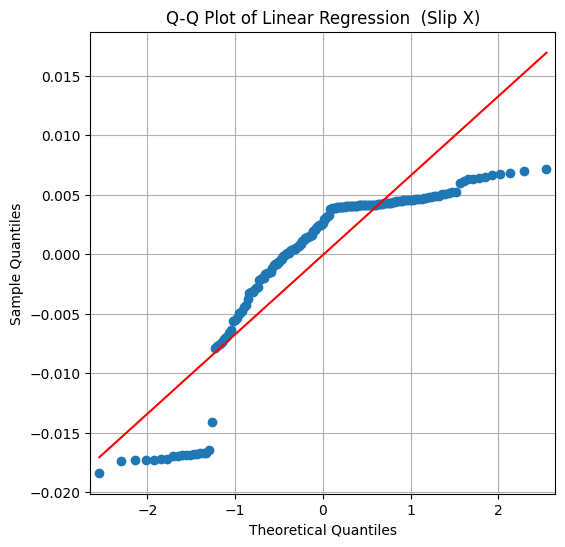

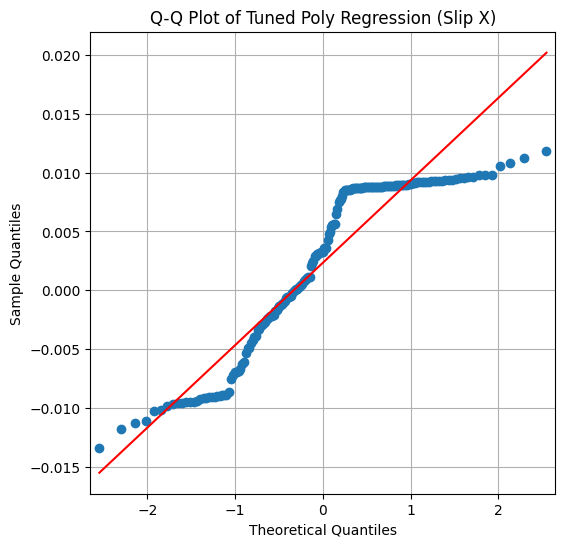

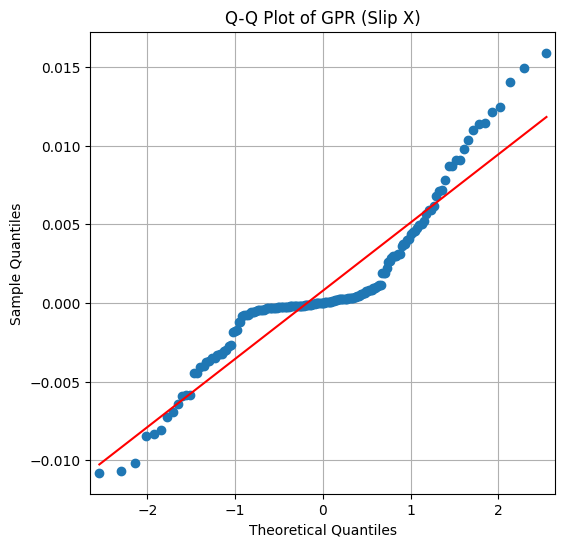

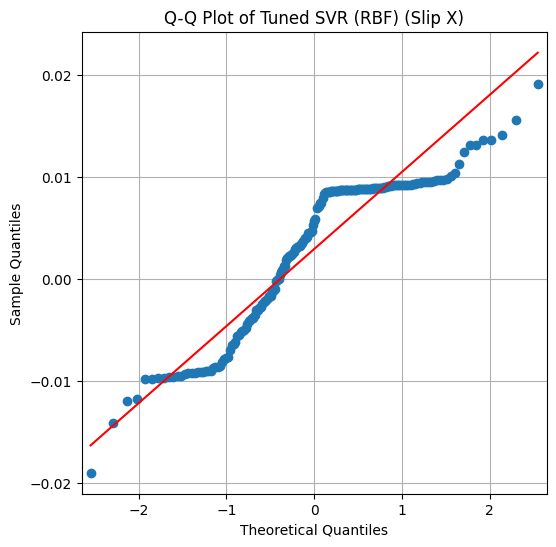

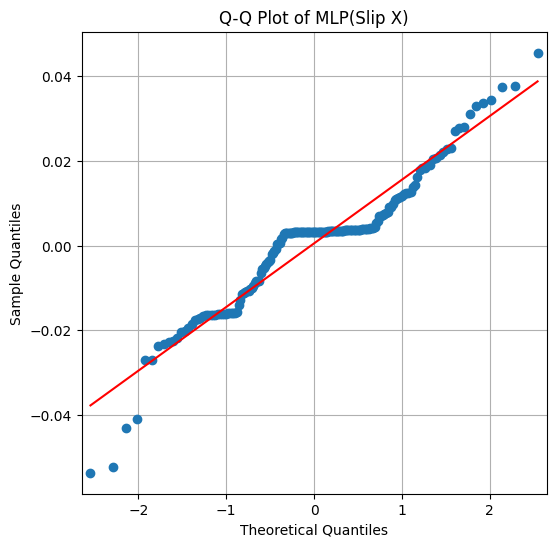

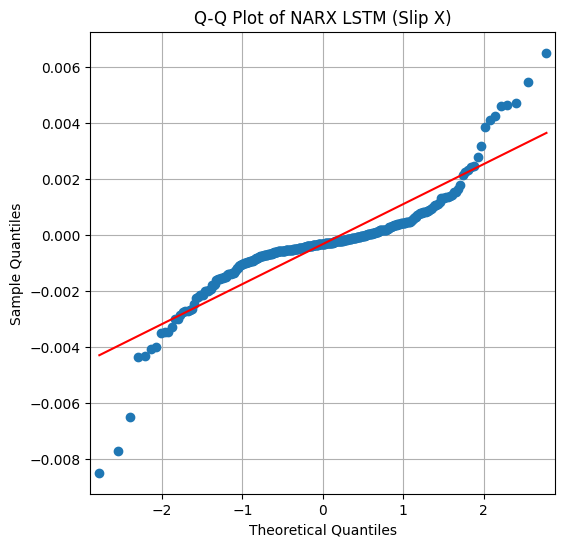

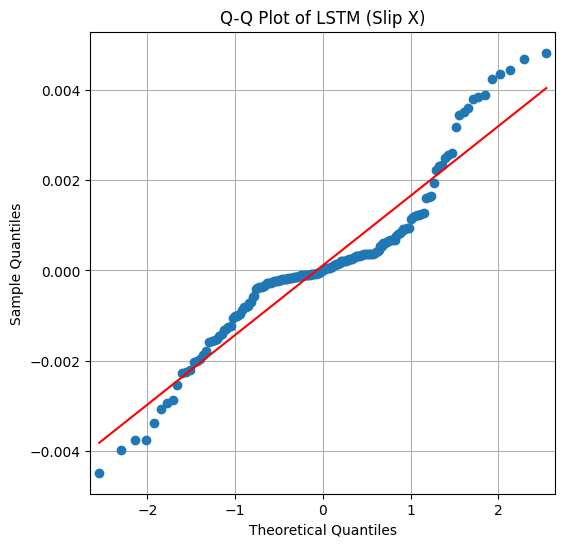

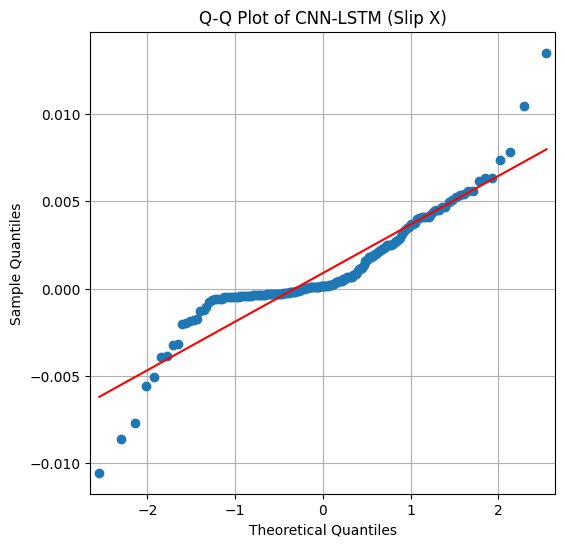

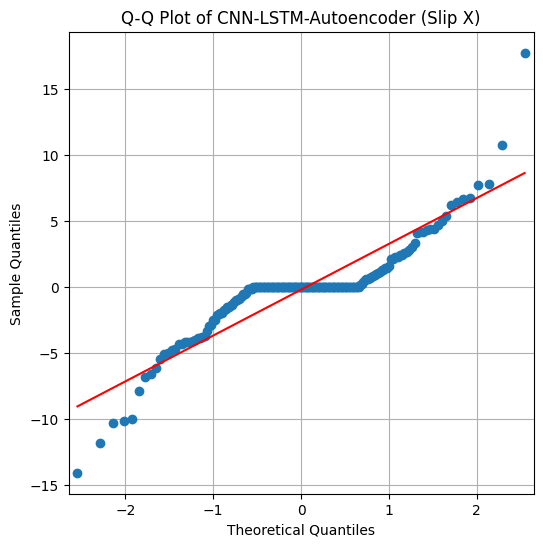


Generating Q-Q plots for Slip Y residuals from all models...


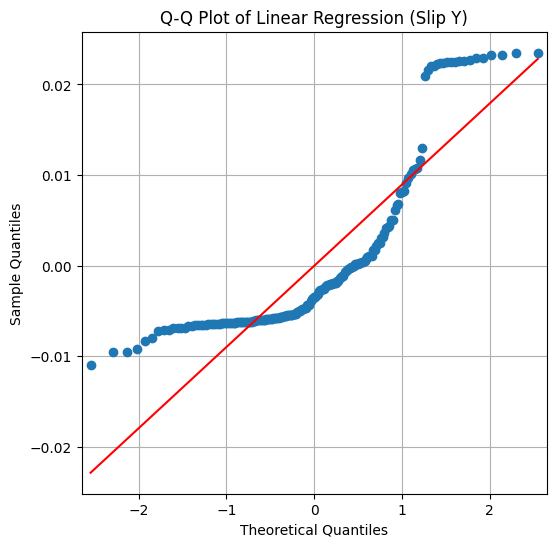

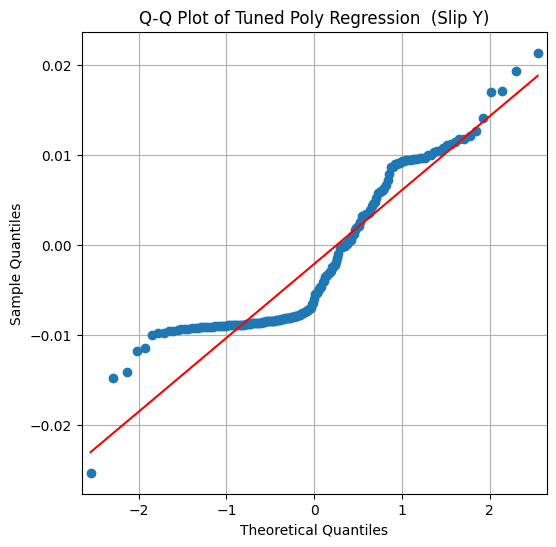

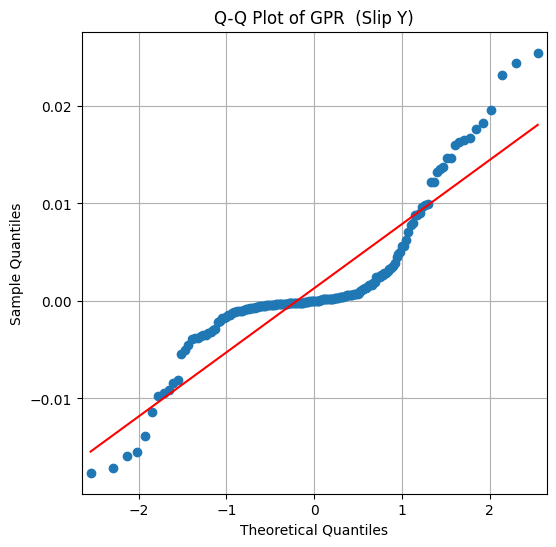

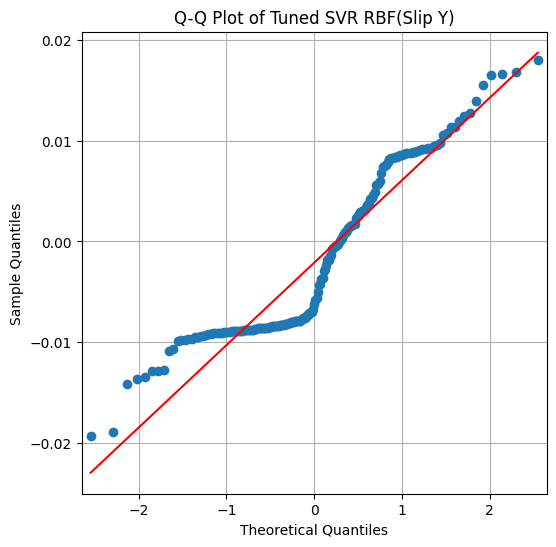

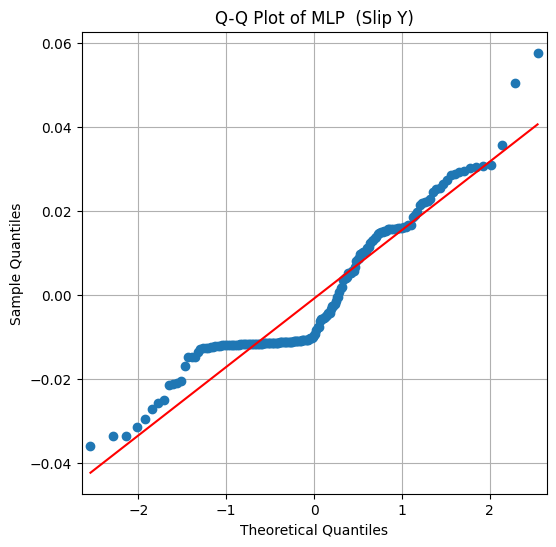

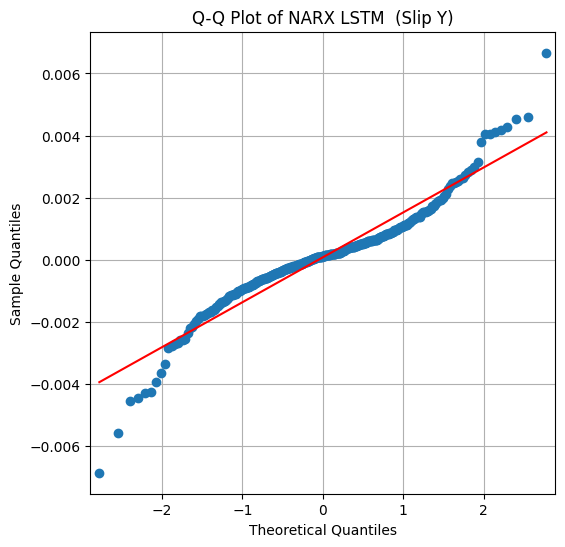

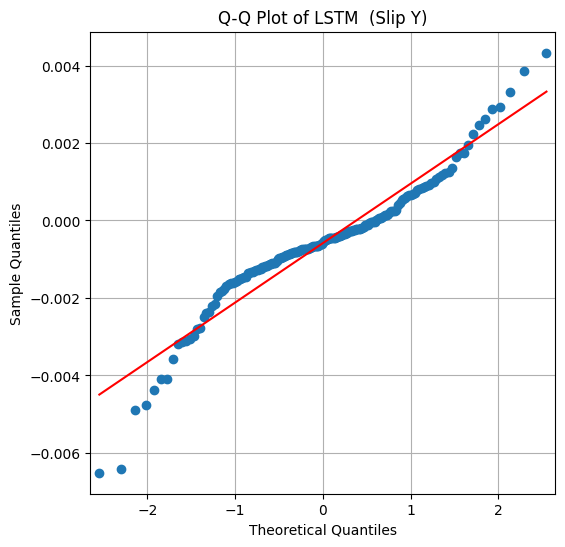

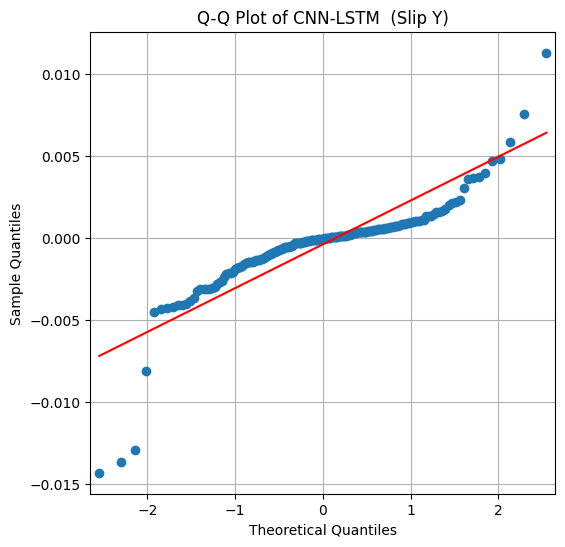

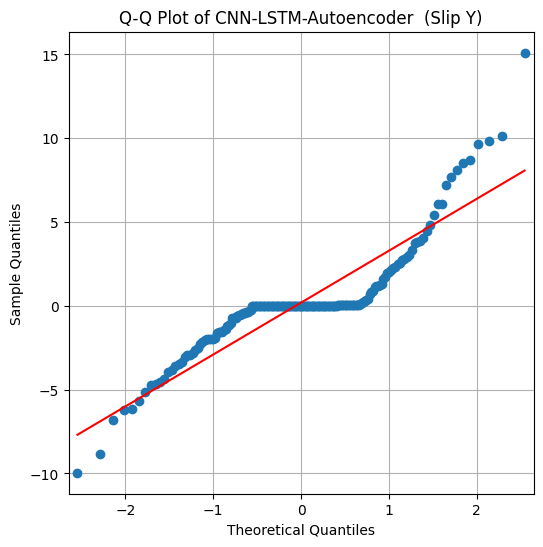

In [36]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


def create_qq_plot(residuals, title):
    plt.figure(figsize=(6, 6))
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- Q-Q Plots for Slip X Residuals ---
print("Generating Q-Q plots for Slip X residuals from all models...")

residuals_x_lr = y_test[:, 0] - y_pred[:, 0] # From Linear Regression
residuals_x_poly_tuned = y_test[:, 0] - y_pred_x_poly_tuned # From Tuned Polynomial Regression
residuals_x_gpr = y_test[:, 0] - y_pred_x_gpr # From GPR
residuals_x_rbf_tuned = y_test[:, 0] - y_pred_x_rbf_tuned # From Tuned SVR (RBF)
residuals_x_mlp = y_test[:, 0] - y_pred_mlp2[:, 0] # From MLP
residuals_x_narx = y_test_narx['slip_x'] - y_pred_narx_2layer[:, 0] # From NARX LSTM
residuals_x_lstm = y_test[:, 0] - y_pred_lstm_2layer[:, 0] # From LSTM
residuals_x_cnn_lstm = y_test[:, 0] - y_pred_cnn_lstm[:, 0] # From CNN-LSTM
residuals_x_cnn_lstm_ae = y_test[:, 0] - y_pred_cnn_lstm_ae[:, 0] # From CNN-LSTM-Autoencoder


create_qq_plot(residuals_x_lr, 'Q-Q Plot of Linear Regression  (Slip X)')
create_qq_plot(residuals_x_poly_tuned, 'Q-Q Plot of Tuned Poly Regression (Slip X)')
create_qq_plot(residuals_x_gpr, 'Q-Q Plot of GPR (Slip X)')
create_qq_plot(residuals_x_rbf_tuned, 'Q-Q Plot of Tuned SVR (RBF) (Slip X)')
create_qq_plot(residuals_x_mlp, 'Q-Q Plot of MLP(Slip X)')
create_qq_plot(residuals_x_narx, 'Q-Q Plot of NARX LSTM (Slip X)')
create_qq_plot(residuals_x_lstm, 'Q-Q Plot of LSTM (Slip X)')
create_qq_plot(residuals_x_cnn_lstm, 'Q-Q Plot of CNN-LSTM (Slip X)')
create_qq_plot(residuals_x_cnn_lstm_ae, 'Q-Q Plot of CNN-LSTM-Autoencoder (Slip X)')

# --- Q-Q Plots for Slip Y Residuals ---
print("\nGenerating Q-Q plots for Slip Y residuals from all models...")

# Calculate residuals for Slip Y
residuals_y_lr = y_test[:, 1] - y_pred[:, 1] # From Linear Regression
residuals_y_poly_tuned = y_test[:, 1] - y_pred_y_poly_tuned # From Tuned Polynomial Regression
residuals_y_gpr = y_test[:, 1] - y_pred_y_gpr # From GPR
residuals_y_rbf_tuned = y_test[:, 1] - y_pred_y_rbf_tuned # From Tuned SVR (RBF)
residuals_y_mlp = y_test[:, 1] - y_pred_mlp2[:, 1] # From MLP
residuals_y_narx = y_test_narx['slip_y'] - y_pred_narx_2layer[:, 1] # From NARX LSTM
residuals_y_lstm = y_test[:, 1] - y_pred_lstm_2layer[:, 1] # From LSTM
residuals_y_cnn_lstm = y_test[:, 1] - y_pred_cnn_lstm[:, 1] # From CNN-LSTM
residuals_y_cnn_lstm_ae = y_test[:, 1] - y_pred_cnn_lstm_ae[:, 1] # From CNN-LSTM-Autoencoder

# Create Q-Q plots for Slip Y residuals from each model
create_qq_plot(residuals_y_lr, 'Q-Q Plot of Linear Regression (Slip Y)')
create_qq_plot(residuals_y_poly_tuned, 'Q-Q Plot of Tuned Poly Regression  (Slip Y)')
create_qq_plot(residuals_y_gpr, 'Q-Q Plot of GPR  (Slip Y)')
create_qq_plot(residuals_y_rbf_tuned, 'Q-Q Plot of Tuned SVR RBF(Slip Y)')
create_qq_plot(residuals_y_mlp, 'Q-Q Plot of MLP  (Slip Y)')
create_qq_plot(residuals_y_narx, 'Q-Q Plot of NARX LSTM  (Slip Y)')
create_qq_plot(residuals_y_lstm, 'Q-Q Plot of LSTM  (Slip Y)')
create_qq_plot(residuals_y_cnn_lstm, 'Q-Q Plot of CNN-LSTM  (Slip Y)')
create_qq_plot(residuals_y_cnn_lstm_ae, 'Q-Q Plot of CNN-LSTM-Autoencoder  (Slip Y)')

Generating Residual Plots for Slip X (MLP, NARX, LSTM, CNN-LSTM, CNN-LSTM-Autoencoder)...


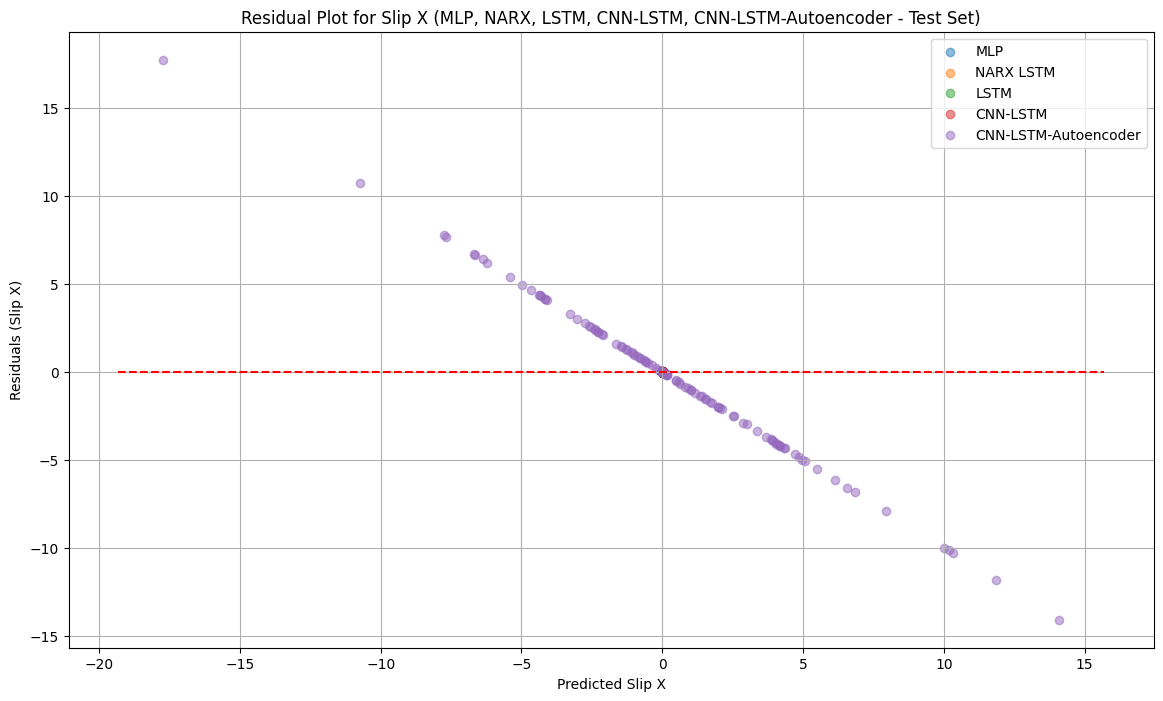


Generating Residual Plots for Slip Y (MLP, NARX, LSTM, CNN-LSTM, CNN-LSTM-Autoencoder)...


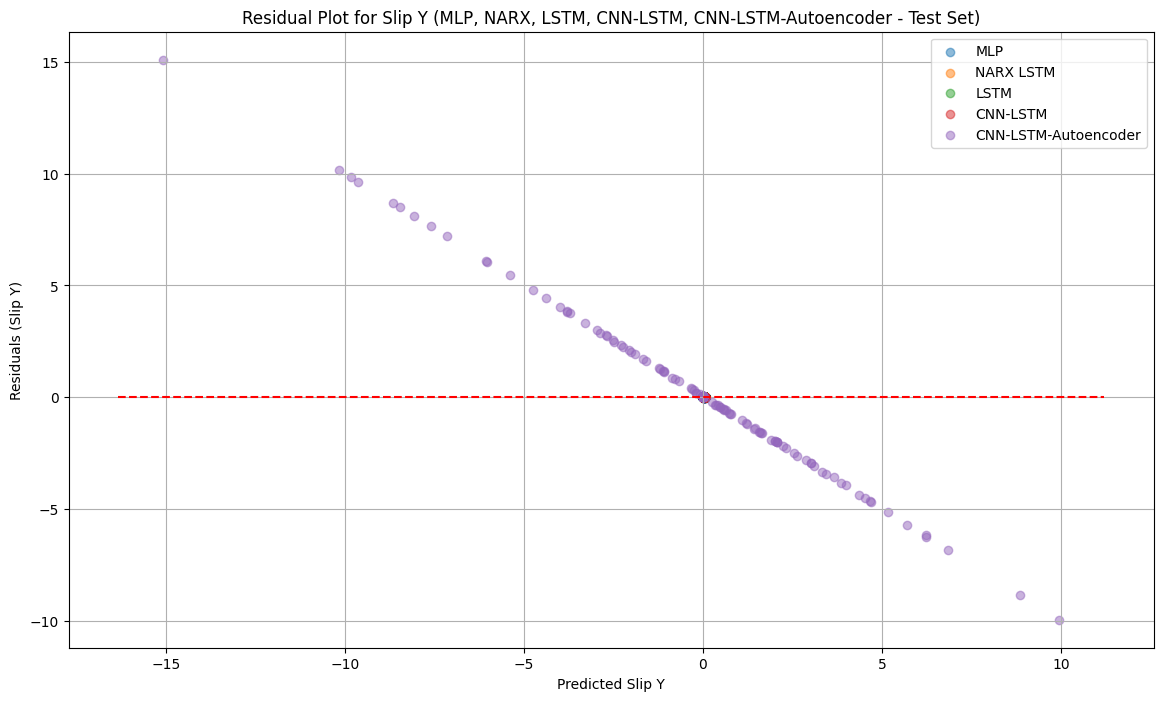

In [37]:
import matplotlib.pyplot as plt
import numpy as np

print("Generating Residual Plots for Slip X (MLP, NARX, LSTM, CNN-LSTM, CNN-LSTM-Autoencoder)...")

# Calculate residuals for Slip X
residuals_x_mlp = y_test[:, 0] - y_pred_mlp2[:, 0] # From MLP
residuals_x_narx = y_test_narx['slip_x'] - y_pred_narx_2layer[:, 0] # From NARX LSTM
residuals_x_lstm = y_test[:, 0] - y_pred_lstm_2layer[:, 0] # From LSTM
residuals_x_cnn_lstm = y_test[:, 0] - y_pred_cnn_lstm[:, 0] # From CNN-LSTM
residuals_x_cnn_lstm_ae = y_test[:, 0] - y_pred_cnn_lstm_ae[:, 0] # From CNN-LSTM-Autoencoder


# Plotting Residuals vs Predicted Values for Slip X
plt.figure(figsize=(14, 8))

plt.scatter(y_pred_mlp2[:, 0], residuals_x_mlp, alpha=0.5, label='MLP')
plt.scatter(y_pred_narx_2layer[:, 0], residuals_x_narx, alpha=0.5, label='NARX LSTM')
plt.scatter(y_pred_lstm_2layer[:, 0], residuals_x_lstm, alpha=0.5, label='LSTM')
plt.scatter(y_pred_cnn_lstm[:, 0], residuals_x_cnn_lstm, alpha=0.5, label='CNN-LSTM')
plt.scatter(y_pred_cnn_lstm_ae[:, 0], residuals_x_cnn_lstm_ae, alpha=0.5, label='CNN-LSTM-Autoencoder')


plt.hlines(y=0, xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors='r', linestyles='--')
plt.xlabel("Predicted Slip X")
plt.ylabel("Residuals (Slip X)")
plt.title("Residual Plot for Slip X (MLP, NARX, LSTM, CNN-LSTM, CNN-LSTM-Autoencoder - Test Set)")
plt.legend()
plt.grid(True)
plt.show()


# --- Residuals for Slip Y ---
print("\nGenerating Residual Plots for Slip Y (MLP, NARX, LSTM, CNN-LSTM, CNN-LSTM-Autoencoder)...")

# Calculate residuals for Slip Y
residuals_y_mlp = y_test[:, 1] - y_pred_mlp2[:, 1] # From MLP
residuals_y_narx = y_test_narx['slip_y'] - y_pred_narx_2layer[:, 1] # From NARX LSTM
residuals_y_lstm = y_test[:, 1] - y_pred_lstm_2layer[:, 1] # From LSTM
residuals_y_cnn_lstm = y_test[:, 1] - y_pred_cnn_lstm[:, 1] # From CNN-LSTM
residuals_y_cnn_lstm_ae = y_test[:, 1] - y_pred_cnn_lstm_ae[:, 1] # From CNN-LSTM-Autoencoder

# Plotting Residuals vs Predicted Values for Slip Y
plt.figure(figsize=(14, 8))

plt.scatter(y_pred_mlp2[:, 1], residuals_y_mlp, alpha=0.5, label='MLP')
plt.scatter(y_pred_narx_2layer[:, 1], residuals_y_narx, alpha=0.5, label='NARX LSTM')
plt.scatter(y_pred_lstm_2layer[:, 1], residuals_y_lstm, alpha=0.5, label='LSTM')
plt.scatter(y_pred_cnn_lstm[:, 1], residuals_y_cnn_lstm, alpha=0.5, label='CNN-LSTM')
plt.scatter(y_pred_cnn_lstm_ae[:, 1], residuals_y_cnn_lstm_ae, alpha=0.5, label='CNN-LSTM-Autoencoder')


plt.hlines(y=0, xmin=plt.xlim()[0], xmax=plt.xlim()[1], colors='r', linestyles='--')
plt.xlabel("Predicted Slip Y")
plt.ylabel("Residuals (Slip Y)")
plt.title("Residual Plot for Slip Y (MLP, NARX, LSTM, CNN-LSTM, CNN-LSTM-Autoencoder - Test Set)")
plt.legend()
plt.grid(True)
plt.show()

Generating Q-Q plots for Slip X residuals from all models...


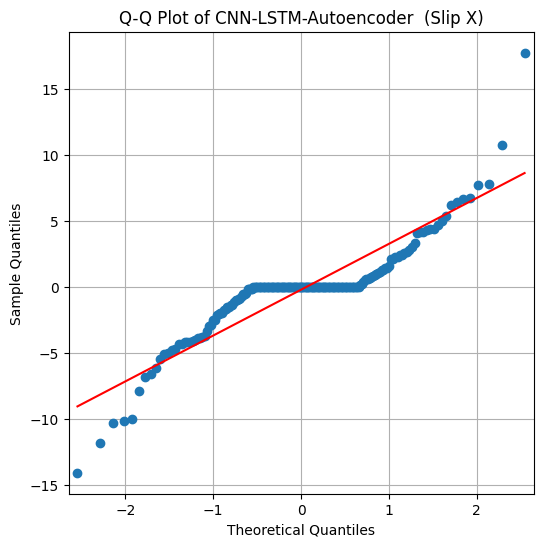

In [38]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

def create_qq_plot(residuals, title):
    plt.figure(figsize=(6, 6))
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- Q-Q Plots for Slip X Residuals ---
print("Generating Q-Q plots for Slip X residuals from all models...")

# Calculate residuals for Slip X
residuals_x_lr = y_test[:, 0] - y_pred[:, 0] # From Linear Regression
residuals_x_poly_tuned = y_test[:, 0] - y_pred_x_poly_tuned # From Tuned Polynomial Regression
residuals_x_gpr = y_test[:, 0] - y_pred_x_gpr # From GPR
residuals_x_rbf_tuned = y_test[:, 0] - y_pred_x_rbf_tuned # From Tuned SVR (RBF)
residuals_x_mlp = y_test[:, 0] - y_pred_mlp2[:, 0] # From MLP
residuals_x_narx = y_test_narx['slip_x'] - y_pred_narx_2layer[:, 0] # From NARX LSTM
residuals_x_lstm = y_test[:, 0] - y_pred_lstm_2layer[:, 0] # From LSTM
residuals_x_cnn_lstm = y_test[:, 0] - y_pred_cnn_lstm[:, 0] # From CNN-LSTM
residuals_x_cnn_lstm_ae = y_test[:, 0] - y_pred_cnn_lstm_ae[:, 0] # From CNN-LSTM-Autoencoder

create_qq_plot(residuals_x_cnn_lstm_ae, 'Q-Q Plot of CNN-LSTM-Autoencoder  (Slip X)')